# New algorithm

In [2]:
#! pip install pulp

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import itertools
import pulp
from collections import defaultdict

In [1]:
original_TASKS = [
    {'job': 'J1', 'machine': 'M2', 'dur': 21, 'prec': None},
    {'job': 'J2', 'machine': 'M1', 'dur': 21, 'prec': None},
    {'job': 'J3', 'machine': 'M4', 'dur': 39, 'prec': None},
    {'job': 'J4', 'machine': 'M2', 'dur': 77, 'prec': None},
    {'job': 'J5', 'machine': 'M1', 'dur': 83, 'prec': None},
    {'job': 'J6', 'machine': 'M2', 'dur': 54, 'prec': None},
    {'job': 'J7', 'machine': 'M4', 'dur': 69, 'prec': None},
    {'job': 'J8', 'machine': 'M3', 'dur': 38, 'prec': None},
    {'job': 'J9', 'machine': 'M4', 'dur': 17, 'prec': None},
    {'job': 'J10', 'machine': 'M5', 'dur': 77, 'prec': None},
    {'job': 'J1', 'machine': 'M1', 'dur': 53, 'prec': ('J1', 'M2')},
    {'job': 'J2', 'machine': 'M4', 'dur': 52, 'prec': ('J2', 'M1')},
    {'job': 'J3', 'machine': 'M5', 'dur': 98, 'prec': ('J3', 'M4')},
    {'job': 'J4', 'machine': 'M1', 'dur': 55, 'prec': ('J4', 'M2')},
    {'job': 'J5', 'machine': 'M4', 'dur': 34, 'prec': ('J5', 'M1')},
    {'job': 'J6', 'machine': 'M3', 'dur': 43, 'prec': ('J6', 'M2')},
    {'job': 'J7', 'machine': 'M5', 'dur': 77, 'prec': ('J7', 'M4')},
    {'job': 'J8', 'machine': 'M1', 'dur': 60, 'prec': ('J8', 'M3')},
    {'job': 'J9', 'machine': 'M2', 'dur': 49, 'prec': ('J9', 'M4')},
    {'job': 'J10', 'machine': 'M4', 'dur': 79, 'prec': ('J10', 'M5')},
    {'job': 'J1', 'machine': 'M5', 'dur': 95, 'prec': ('J1', 'M1')},
    {'job': 'J2', 'machine': 'M5', 'dur': 16, 'prec': ('J2', 'M4')},
    {'job': 'J3', 'machine': 'M2', 'dur': 42, 'prec': ('J3', 'M5')},
    {'job': 'J4', 'machine': 'M5', 'dur': 79, 'prec': ('J4', 'M1')},
    {'job': 'J5', 'machine': 'M3', 'dur': 64, 'prec': ('J5', 'M4')},
    {'job': 'J6', 'machine': 'M5', 'dur': 79, 'prec': ('J6', 'M3')},
    {'job': 'J7', 'machine': 'M2', 'dur': 87, 'prec': ('J7', 'M5')},
    {'job': 'J8', 'machine': 'M2', 'dur': 41, 'prec': ('J8', 'M1')},
    {'job': 'J9', 'machine': 'M5', 'dur': 25, 'prec': ('J9', 'M2')},
    {'job': 'J10', 'machine': 'M3', 'dur': 43, 'prec': ('J10', 'M4')},
    {'job': 'J1', 'machine': 'M4', 'dur': 55, 'prec': ('J1', 'M5')},
    {'job': 'J2', 'machine': 'M3', 'dur': 26, 'prec': ('J2', 'M5')},
    {'job': 'J3', 'machine': 'M3', 'dur': 31, 'prec': ('J3', 'M2')},
    {'job': 'J4', 'machine': 'M3', 'dur': 66, 'prec': ('J4', 'M5')},
    {'job': 'J5', 'machine': 'M2', 'dur': 19, 'prec': ('J5', 'M3')},
    {'job': 'J6', 'machine': 'M1', 'dur': 92, 'prec': ('J6', 'M5')},
    {'job': 'J7', 'machine': 'M3', 'dur': 87, 'prec': ('J7', 'M2')},
    {'job': 'J8', 'machine': 'M4', 'dur': 24, 'prec': ('J8', 'M2')},
    {'job': 'J9', 'machine': 'M1', 'dur': 44, 'prec': ('J9', 'M5')},
    {'job': 'J10', 'machine': 'M2', 'dur': 75, 'prec': ('J10', 'M3')},
    {'job': 'J1', 'machine': 'M3', 'dur': 34, 'prec': ('J1', 'M4')},
    {'job': 'J2', 'machine': 'M2', 'dur': 71, 'prec': ('J2', 'M3')},
    {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': ('J3', 'M3')},
    {'job': 'J4', 'machine': 'M4', 'dur': 77, 'prec': ('J4', 'M3')},
    {'job': 'J5', 'machine': 'M5', 'dur': 37, 'prec': ('J5', 'M2')},
    {'job': 'J6', 'machine': 'M4', 'dur': 62, 'prec': ('J6', 'M1')},
    {'job': 'J7', 'machine': 'M1', 'dur': 93, 'prec': ('J7', 'M3')},
    {'job': 'J8', 'machine': 'M5', 'dur': 83, 'prec': ('J8', 'M4')},
    {'job': 'J9', 'machine': 'M3', 'dur': 98, 'prec': ('J9', 'M1')},
    {'job': 'J10', 'machine': 'M1', 'dur': 96, 'prec': ('J10', 'M2')}
]

In [42]:
modified_TASKS = [
    {'job': 'J1', 'machine': 'M1', 'dur': 45, 'prec': None},
    {'job': 'J1', 'machine': 'M2', 'dur': 20, 'prec': ('J1', 'M1')},
    {'job': 'J2', 'machine': 'M1', 'dur': 20, 'prec': ('J2', 'M2')},
    {'job': 'J2', 'machine': 'M2', 'dur': 10, 'prec': None}
]

In [2]:
original_TASKS = [
    {'job': 'J1', 'machine': 'M1', 'dur': 45, 'prec': None},
    {'job': 'J1', 'machine': 'M3', 'dur': 10, 'prec': ('J1', 'M1')},
    {'job': 'J1', 'machine': 'M2', 'dur': 20, 'prec': ('J1', 'M3')},
    {'job': 'J2', 'machine': 'M1', 'dur': 20, 'prec': None},
    {'job': 'J2', 'machine': 'M2', 'dur': 10, 'prec': ('J2', 'M3')},
    {'job': 'J2', 'machine': 'M3', 'dur': 34, 'prec': ('J2', 'M1')},
    {'job': 'J3', 'machine': 'M1', 'dur': 12, 'prec': ('J3', 'M3')},
    {'job': 'J3', 'machine': 'M2', 'dur': 17, 'prec': ('J3', 'M1')},
    {'job': 'J3', 'machine': 'M3', 'dur': 28, 'prec': None}
    ]


In [38]:
custom_input = [
    {'job': 'J1', 'machine': 'M4', 'dur': 12, 'prec': None},
    {'job': 'J1', 'machine': 'M5', 'dur': 10, 'prec': ('J1', 'M4')},
    {'job': 'J1', 'machine': 'M3', 'dur': 14, 'prec': ('J1', 'M5')},
    {'job': 'J1', 'machine': 'M2', 'dur': 16, 'prec': ('J1', 'M3')},
    {'job': 'J1', 'machine': 'M1', 'dur': 18, 'prec': ('J1', 'M2')},
    {'job': 'J2', 'machine': 'M2', 'dur': 17, 'prec': None},
    {'job': 'J2', 'machine': 'M1', 'dur': 9, 'prec': ('J2', 'M2')},
    {'job': 'J2', 'machine': 'M4', 'dur': 14, 'prec': ('J2', 'M1')},
    {'job': 'J2', 'machine': 'M5', 'dur': 8, 'prec': ('J2', 'M4')},
    {'job': 'J2', 'machine': 'M3', 'dur': 11, 'prec': ('J2', 'M5')},
    {'job': 'J3', 'machine': 'M3', 'dur': 8, 'prec': None},
    {'job': 'J3', 'machine': 'M4', 'dur': 11, 'prec': ('J3', 'M3')},
    {'job': 'J3', 'machine': 'M2', 'dur': 7, 'prec': ('J3', 'M4')},
    {'job': 'J3', 'machine': 'M5', 'dur': 10, 'prec': ('J3', 'M2')},
    {'job': 'J3', 'machine': 'M1', 'dur': 13, 'prec': ('J3', 'M5')},
    {'job': 'J4', 'machine': 'M1', 'dur': 6, 'prec': None},
    {'job': 'J4', 'machine': 'M5', 'dur': 10, 'prec': ('J4', 'M1')},
    {'job': 'J4', 'machine': 'M4', 'dur': 15, 'prec': ('J4', 'M5')},
    {'job': 'J4', 'machine': 'M3', 'dur': 9, 'prec': ('J4', 'M4')},
    {'job': 'J4', 'machine': 'M2', 'dur': 8, 'prec': ('J4', 'M3')},
    {'job': 'J5', 'machine': 'M3', 'dur': 19, 'prec': None},
    {'job': 'J5', 'machine': 'M2', 'dur': 10, 'prec': ('J5', 'M3')},
    {'job': 'J5', 'machine': 'M4', 'dur': 8, 'prec': ('J5', 'M2')},
    {'job': 'J5', 'machine': 'M5', 'dur': 14, 'prec': ('J5', 'M4')},
    {'job': 'J5', 'machine': 'M1', 'dur': 16, 'prec': ('J5', 'M5')}
]


In [225]:
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks that can be scheduled
        schedulable_tasks = [task for task in TASKS if task['prec'] is None or task['prec'] in [(s[0], s[1]) for s in schedules]]

        if schedulable_tasks:
            next_task = random.choice(schedulable_tasks)
        else:
            # If no schedulable tasks, break the loop to avoid infinite loop
            break

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules

def sampling_jss(TASKS , rev):
  all_schedules = {}
  for i in range(rev):
    # Make a copy of the original_TASKS to use in each example
    task = TASKS.copy()
    example_schedule = job_shop_scheduling_random_choose(task)

    # Store the schedule in the dictionary with the example number as the key
    all_schedules[i] = example_schedule
  return all_schedules

# Create an empty list to store scheduling information
scheduling_info = []

# Iterate through the schedules and add them to the list
for example, schedule in sampling_jss(original_TASKS,100).items():
    for step, (job, machine, start_time, end_time) in enumerate(schedule, start=1):
        scheduling_info.append({'Example': example, 'Job': job, 'Machine': machine, 'Start Time': start_time, 'End Time': end_time})
df = pd.DataFrame(scheduling_info)

# Convert the "End Time" column to numeric
df['End Time'] = pd.to_numeric(df['End Time'])

# Group the DataFrame by the "Example" column
grouped = df.groupby('Example')

# Initialize empty lists to store results
max_end_times = []
job_machine_sequences = []

# Iterate through each example group
for example, group in grouped:
    # Find the index of the maximum end time for this example
    max_end_time_index = group['End Time'].idxmax()

    # Get all job and machine sequences for this example
    sequences = group[['Job', 'Machine']].values.tolist()

    # Append the results to the lists
    max_end_times.append(group.loc[max_end_time_index, 'End Time'])
    job_machine_sequences.append(sequences)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Example': grouped.groups.keys(), 'Max_End_Time': max_end_times, 'Job_Machine_Sequences': job_machine_sequences})

result_df['Job_Machine_Sequences'] = result_df['Job_Machine_Sequences'].apply(lambda x: tuple(map(tuple, x)))

# Drop duplicates
result_df = result_df.drop_duplicates(subset=['Max_End_Time', 'Job_Machine_Sequences'])

# Sort the DataFrame by the "Min_End_Time" column in ascending order
sorted_df = result_df.copy().sort_values(by='Max_End_Time', ascending=True)

# Get the top 30 minimum end times and their associated sequences
top_min_end_times= sorted_df.head(5)
top_min_end_times = top_min_end_times[['Example' , 'Max_End_Time' , 'Job_Machine_Sequences']]
top_min_end_times_example = top_min_end_times['Example'].values
top_min_end_times['Weight'] = round(max(top_min_end_times['Max_End_Time'])/top_min_end_times['Max_End_Time'],2)
top_min_end_times



Example  Max_End_Time                              Job_Machine_Sequences  \
1         1           109  ((J1, M1), (J3, M3), (J1, M3), (J2, M1), (J2, ...   
15       15           109  ((J1, M1), (J3, M3), (J1, M3), (J2, M1), (J1, ...   
98       98           109  ((J1, M1), (J2, M1), (J3, M3), (J1, M3), (J1, ...   
73       73           114  ((J3, M3), (J2, M1), (J1, M1), (J2, M3), (J3, ...   
12       12           114  ((J3, M3), (J2, M1), (J2, M3), (J1, M1), (J2, ...   

    Weight  
1     1.05  
15    1.05  
98    1.05  
73    1.00  
12    1.00

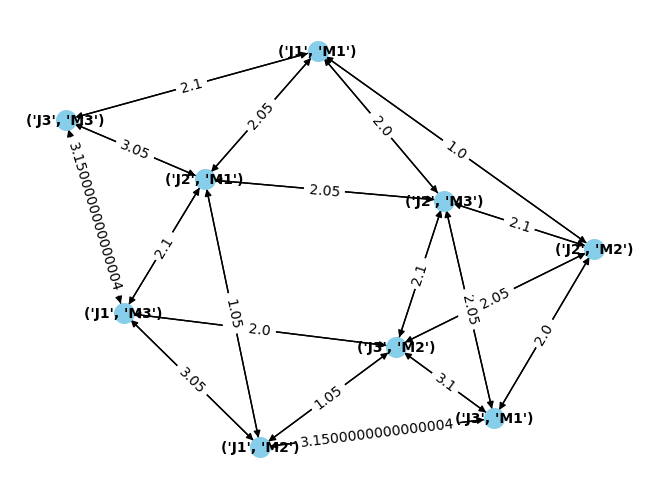

defaultdict(float,
            {(('J1', 'M1'), ('J3', 'M3')): 2.1,
             (('J3', 'M3'), ('J1', 'M1')): 2.1,
             (('J3', 'M3'), ('J1', 'M3')): 3.1500000000000004,
             (('J1', 'M3'), ('J3', 'M3')): 3.1500000000000004,
             (('J1', 'M3'), ('J2', 'M1')): 2.1,
             (('J2', 'M1'), ('J1', 'M3')): 2.1,
             (('J2', 'M1'), ('J2', 'M3')): 2.05,
             (('J2', 'M3'), ('J2', 'M1')): 2.05,
             (('J2', 'M3'), ('J3', 'M1')): 2.05,
             (('J3', 'M1'), ('J2', 'M3')): 2.05,
             (('J3', 'M1'), ('J1', 'M2')): 3.1500000000000004,
             (('J1', 'M2'), ('J3', 'M1')): 3.1500000000000004,
             (('J1', 'M2'), ('J3', 'M2')): 1.05,
             (('J3', 'M2'), ('J1', 'M2')): 1.05,
             (('J3', 'M2'), ('J2', 'M2')): 2.05,
             (('J2', 'M2'), ('J3', 'M2')): 2.05,
             (('J2', 'M1'), ('J1', 'M2')): 1.05,
             (('J1', 'M2'), ('J2', 'M1')): 1.05,
             (('J3', 'M1'), ('J3', 'M2')): 3.1,

In [226]:
# Create a directed graph from your data
G = nx.DiGraph()

# Initialize a defaultdict to store aggregated weights for all pairs of nodes
aggregated_weights = defaultdict(float)

# Add edges with weights
for idx, row in top_min_end_times.iterrows():
    job_machine_sequence = row['Job_Machine_Sequences']
    weight = row['Weight']
    # Iterate through each consecutive pair of job-machine pairs in the sequence
    for i in range(len(job_machine_sequence) - 1):
        pair1 = job_machine_sequence[i]
        pair2 = job_machine_sequence[i + 1]
        # Form unique keys for the pairs to store aggregated weights
        key1 = (pair1, pair2)
        key2 = (pair2, pair1)
        # Add the weight to the aggregated weights dictionary for both pairs of nodes
        aggregated_weights[key1] += weight
        aggregated_weights[key2] += weight

# Add edges with aggregated weights
for pairs, weight_sum in aggregated_weights.items():
    pair1, pair2 = pairs
    G.add_edge(pair1, pair2, weight=weight_sum)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_size=10)

# Show the graph
plt.show()

aggregated_weights

In [228]:
import pandas as pd

# Convert the defaultdict to a regular dictionary
aggregated_weights_dict = dict(aggregated_weights)

# Extract all unique job-machine pairs
unique_pairs = set()
for pair1, pair2 in aggregated_weights_dict.keys():
    unique_pairs.add(pair1)
    unique_pairs.add(pair2)

# Convert the unique pairs to strings
unique_pairs_str = [f"{pair[0]}, {pair[1]}" for pair in unique_pairs]

# Initialize an empty DataFrame
df = pd.DataFrame(index=unique_pairs_str, columns=unique_pairs_str)

# Fill the DataFrame with weights
for pair1 in unique_pairs_str:
    for pair2 in unique_pairs_str:
        pair1_tuple = tuple(map(str.strip, pair1.split(',')))
        pair2_tuple = tuple(map(str.strip, pair2.split(',')))
        weight = aggregated_weights_dict.get((pair1_tuple, pair2_tuple), 0)
        df.at[pair1, pair2] = weight

# Convert NaN values to 0
df = df.fillna(0)

# Display the DataFrame
df


J2, M2  J3, M3  J3, M1  J1, M3  J1, M1  J3, M2  J2, M3  J1, M2  J2, M1
J2, M2    0.00    0.00    2.00    0.00    1.00    2.05    2.10    0.00    0.00
J3, M3    0.00    0.00    0.00    3.15    2.10    0.00    0.00    0.00    3.05
J3, M1    2.00    0.00    0.00    0.00    0.00    3.10    2.05    3.15    0.00
J1, M3    0.00    3.15    0.00    0.00    0.00    2.00    0.00    3.05    2.10
J1, M1    1.00    2.10    0.00    0.00    0.00    0.00    2.00    0.00    2.05
J3, M2    2.05    0.00    3.10    2.00    0.00    0.00    2.10    1.05    0.00
J2, M3    2.10    0.00    2.05    0.00    2.00    2.10    0.00    0.00    2.05
J1, M2    0.00    0.00    3.15    3.05    0.00    1.05    0.00    0.00    1.05
J2, M1    0.00    3.05    0.00    2.10    2.05    0.00    2.05    1.05    0.00

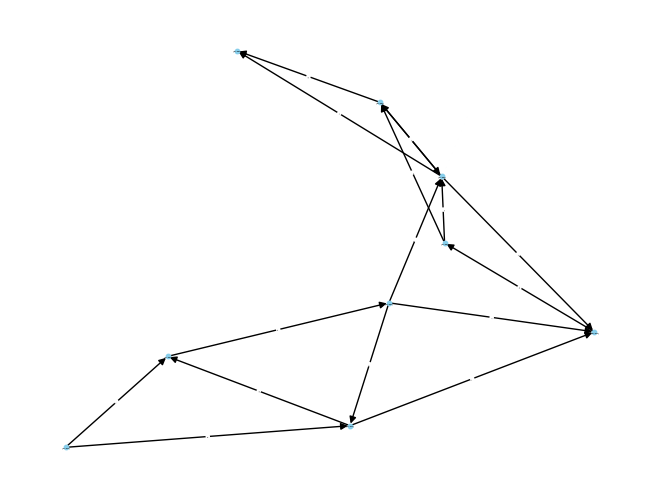

In [214]:
# Create a directed graph from your data
G = nx.DiGraph()

# Initialize a defaultdict to store aggregated weights for all pairs of nodes
aggregated_weights = defaultdict(float)

# Add edges with weights
for idx, row in top_min_end_times.iterrows():
    job_machine_sequence = row['Job_Machine_Sequences']
    weight = row['Weight']
    # Iterate through each consecutive pair of job-machine pairs in the sequence
    for i in range(len(job_machine_sequence) - 1):
        pair1 = job_machine_sequence[i]
        pair2 = job_machine_sequence[i + 1]
        # Form unique keys for the pairs to store aggregated weights
        key = (pair1, pair2)
        # Add the weight to the aggregated weights dictionary for the pair of nodes
        aggregated_weights[key] += weight

# Add edges with aggregated weights
for pairs, weight_sum in aggregated_weights.items():
    pair1, pair2 = pairs
    G.add_edge(pair1, pair2, weight=weight_sum)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', font_size=0.1, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_size=0.1)

# Show the graph
plt.show()


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/9e5312da755e41abb6a4103cea982178-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/9e5312da755e41abb6a4103cea982178-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 82 RHS
At line 93 BOUNDS
At line 110 ENDATA
Problem MODEL has 10 rows, 16 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

Status: Infeasible
Total Profit: 8.0


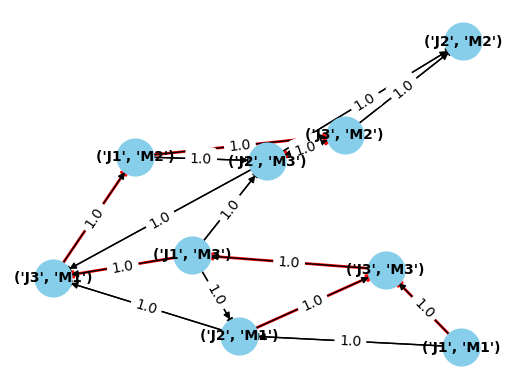

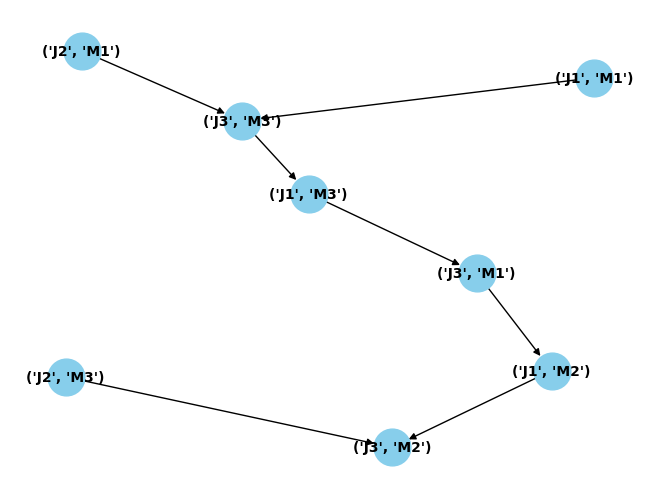

[(('J1', 'M1'), ('J3', 'M3')), (('J2', 'M1'), ('J3', 'M3')), (('J3', 'M3'), ('J1', 'M3')), (('J1', 'M3'), ('J3', 'M1')), (('J3', 'M1'), ('J1', 'M2')), (('J1', 'M2'), ('J3', 'M2')), (('J2', 'M3'), ('J3', 'M2'))]


In [218]:
# Add edges with weights
for idx, row in top_min_end_times.iterrows():
    job_machine_sequence = row['Job_Machine_Sequences']
    weight = row['Weight']
    for i in range(len(job_machine_sequence) - 1):
        G.add_edge(job_machine_sequence[i], job_machine_sequence[i+1], weight=weight)

# Initialize PuLP problem
prob = pulp.LpProblem("Job_Shop_Scheduling", pulp.LpMaximize)

# Decision variables
x = pulp.LpVariable.dicts("start", G.edges(), cat='Binary')

# Objective function
prob += pulp.lpSum(x[(source, target)] * G[source][target]['weight'] for source, target in G.edges())

# Constraints
for node in G.nodes():
    # Each job starts exactly once
    prob += pulp.lpSum(x[(source, target)] for source, target in G.out_edges(node)) == 1

# Find the first task with 'prec' attribute as None
first_task = next(task for task in original_TASKS if task['prec'] is None)

# Manually specify the initial node based on the first task
first_node = (first_task['job'], first_task['machine'])

# Add constraint to ensure the selected node is the starting node
prob += pulp.lpSum(x[(source, target)] for source, target in G.out_edges(first_node)) == 1

# Solve the problem
prob.solve()

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the total profit
print("Total Profit:", pulp.value(prob.objective))

# Draw the graph with solution
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw edges
selected_edges = [(source, target) for source, target in G.edges() if pulp.value(x[(source, target)]) > 0.5]
non_selected_edges = [(source, target) for source, target in G.edges() if pulp.value(x[(source, target)]) <= 0.5]

nx.draw_networkx_edges(G, pos, edgelist=selected_edges, edge_color='red', width=2)  # Selected edges
nx.draw_networkx_edges(G, pos, edgelist=non_selected_edges, edge_color='black', width=1)  # Non-selected edges

# Draw nodes and labels
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
plt.show()

# Extract the sequence of selected jobs from the solution
selected_jobs = [edge for edge in G.edges() if pulp.value(x[edge]) > 0.5]
selected_jobs  = selected_jobs[0:-1]

# Create a new directed graph containing only the selected jobs
selected_graph = nx.DiGraph(selected_jobs)

# Draw the selected graph
pos = nx.spring_layout(selected_graph)  # Positions for all nodes
nx.draw(selected_graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(selected_graph, 'weight')
nx.draw_networkx_edge_labels(selected_graph, pos, edge_labels=edge_labels)

# Show the graph
plt.show()
print(selected_jobs)

In [219]:
def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Check if the graph has cycles
    if not nx.is_directed_acyclic_graph(G):
        print("The graph contains cycles. Removing cycles...")
        cycles = list(nx.simple_cycles(G))
        # Break the cycles by removing edges
        for cycle in cycles:
            for i in range(len(cycle)):
                G.remove_edge(cycle[i], cycle[(i+1) % len(cycle)])  # Remove edges to break the cycle

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences

sequence = get_sequence(selected_jobs)
print(sequence)

[('J1', 'M1'), ('J2', 'M1'), ('J2', 'M3'), ('J3', 'M3'), ('J1', 'M3'), ('J3', 'M1'), ('J1', 'M2'), ('J3', 'M2')]


In [220]:
def job_shop_scheduling_sequence(TASKS, sequence):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    for task_pair in sequence:
        job, machine = task_pair
        next_task = next((task for task in TASKS if task['job'] == job and task['machine'] == machine), None)

        if next_task:
            start_time = max(job_times[job], machine_times[machine])
            end_time = start_time + next_task['dur']
            schedule = (job, machine, start_time, end_time)
            job_times[job] = end_time
            machine_times[machine] = end_time
            schedules.append(schedule)
            TASKS.remove(next_task)

    return schedules
result_schedules = job_shop_scheduling_sequence(original_TASKS.copy(), sequence)
result_schedules


[('J1', 'M1', 0, 45),
 ('J2', 'M1', 45, 65),
 ('J2', 'M3', 65, 99),
 ('J3', 'M3', 99, 127),
 ('J1', 'M3', 127, 137),
 ('J3', 'M1', 127, 139),
 ('J1', 'M2', 137, 157),
 ('J3', 'M2', 157, 174)]

In [149]:
len(result_schedules)

9

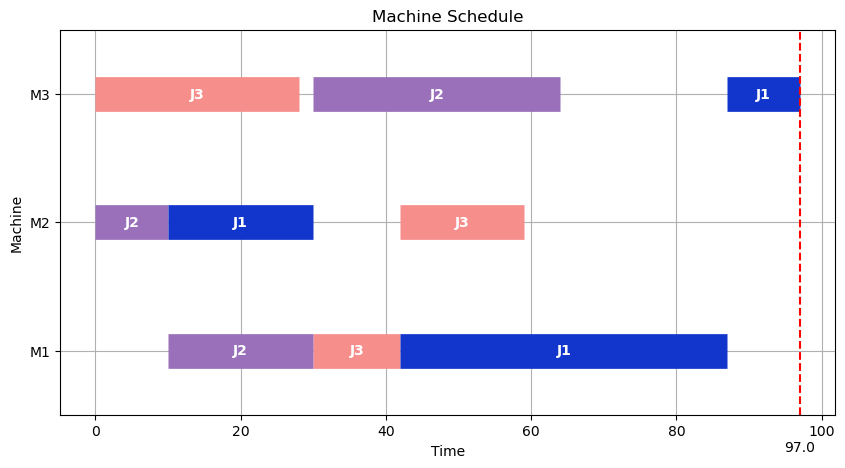

In [152]:
# visualization
def job_shop_scheduling_sequence_to_df(schedule_data):
    df_schedule = pd.DataFrame(schedule_data, columns=['Job', 'Machine', 'Start Time', 'End Time'])

# Add the 'Example' column
    df_schedule['Example'] = (df_schedule.groupby(['Job', 'Machine']).cumcount() + 1).astype(str)

# Reorder columns
    df_schedule = df_schedule[['Example', 'Job', 'Machine', 'Start Time', 'End Time']]

# Print the DataFrame
    return(df_schedule)

def generate_random_color():
    # Generate a random color in hexadecimal format
    return "#{:06x}".format(np.random.randint(0, 256**3))

# Plot this sequence
def visualize_gantt_chart_machine_sequence(df):
    MACHINES = sorted(list(df['Machine'].unique()))
    unique_jobs = df['Job'].unique()
    num_jobs = len(unique_jobs)
    makespan = df['End Time'].max()

    # Define a dictionary to map jobs to colors
    job_colors = {job: generate_random_color() for job in unique_jobs}

    plt.figure(figsize=(10, 5))

    bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
    text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

    df.sort_values(by=['Machine', 'Start Time'])
    df.set_index(['Machine', 'Job'], inplace=True)

    plt.title('Machine Schedule')
    plt.ylabel('Machine')
    plt.ylim(0.5, len(MACHINES) + 0.5)
    plt.yticks(range(1, 1 + len(MACHINES)), MACHINES)

    for mdx, m in enumerate(MACHINES, 1):
        for jdx, j in enumerate(unique_jobs, 1):
            if (m, j) in df.index:
                xs = df.loc[(m, j), 'Start Time']
                xf = df.loc[(m, j), 'End Time']

                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified

                plt.plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                plt.text((xs + xf) / 2, mdx, j, **text_style)

    plt.text(makespan, plt.ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
    plt.plot([makespan] * 2, plt.ylim(), 'r--')
    plt.grid(True)

    plt.xlabel('Time')
    plt.show()

# Assuming df_sorted is your DataFrame
# To visualize all examples, use: visualize_gantt_chart_machine(df_sorted)
visualize_gantt_chart_machine_sequence(job_shop_scheduling_sequence_to_df(result_schedules))

# Combine code

In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import random
import matplotlib.pyplot as plt
import itertools
import pulp
from collections import defaultdict
import time

In [4]:
def change_input(data):
    TASKS = []
    for job, line in enumerate(data.splitlines()[1:], start=1):
        nums = line.split()
        prec = None
        for i in range(0, len(nums), 2):
            m = int(nums[i]) + 1
            dur = int(nums[i + 1])
            task = {'job': f"J{job}", 'machine': f"M{m}", 'dur': dur, 'prec': prec}
            TASKS.append(task)
            prec = (f"J{job}", f"M{m}")
    return TASKS


In [5]:
la01 = """
1	21	0	53	4	95	3	55	2	34
0	21	3	52	4	16	2	26	1	71
3	39	4	98	1	42	2	31	0	12
1	77	0	55	4	79	2	66	3	77
0	83	3	34	2	64	1	19	4	37
1	54	2	43	4	79	0	92	3	62
3	69	4	77	1	87	2	87	0	93
2	38	0	60	1	41	3	24	4	83
3	17	1	49	4	25	0	44	2	98
4	77	3	79	2	43	1	75	0	96
"""

la01 = change_input(la01)

In [6]:
la02 = """
0	20	3	87	1	31	4	76	2	17
4	25	2	32	0	24	1	18	3	81
1	72	2	23	4	28	0	58	3	99
2	86	1	76	4	97	0	45	3	90
4	27	0	42	3	48	2	17	1	46
1	67	0	98	4	48	3	27	2	62
4	28	1	12	3	19	0	80	2	50
1	63	0	94	2	98	3	50	4	80
4	14	0	75	2	50	1	41	3	55
4	72	2	18	1	37	3	79	0	61
"""
la02 = change_input(la02)

In [3]:
la03 = """
1	23	2	45	0	82	4	84	3	38
2	21	1	29	0	18	4	41	3	50
2	38	3	54	4	16	0	52	1	52
4	37	0	54	2	74	1	62	3	57
4	57	0	81	1	61	3	68	2	30
4	81	0	79	1	89	2	89	3	11
3	33	2	20	0	91	4	20	1	66
4	24	1	84	0	32	2	55	3	8
4	56	0	7	3	54	2	64	1	39
4	40	1	83	0	19	2	8	3	7
"""
la03 = change_input(la03)

In [4]:
la04 = """
0	12	2	94	3	92	4	91	1	7
1	19	3	11	4	66	2	21	0	87
1	14	0	75	3	13	4	16	2	20
2	95	4	66	0	7	3	7	1	77
1	45	3	6	4	89	0	15	2	34
3	77	2	20	0	76	4	88	1	53
2	74	1	88	0	52	3	27	4	9
1	88	3	69	0	62	4	98	2	52
2	61	4	9	0	62	1	52	3	90
2	54	4	5	3	59	1	15	0	88
"""
la04 = change_input(la04)

In [5]:
la05 = """
1	72	0	87	4	95	2	66	3	60
4	5	3	35	0	48	2	39	1	54
1	46	3	20	2	21	0	97	4	55
0	59	3	19	4	46	1	34	2	37
4	23	2	73	3	25	1	24	0	28
3	28	0	45	4	5	1	78	2	83
0	53	3	71	1	37	4	29	2	12
4	12	2	87	3	33	1	55	0	38
2	49	3	83	1	40	0	48	4	7
2	65	3	17	0	90	4	27	1	23
"""
la05 = change_input(la05)

In [6]:
la06 = """
1	21	2	34	4	95	0	53	3	55
3	52	4	16	1	71	2	26	0	21
2	31	0	12	1	42	3	39	4	98
3	77	1	77	4	79	0	55	2	66
4	37	3	34	2	64	1	19	0	83
2	43	1	54	0	92	3	62	4	79
0	93	3	69	1	87	4	77	2	87
0	60	1	41	2	38	4	83	3	24
2	98	3	17	4	25	0	44	1	49
0	96	4	77	3	79	1	75	2	43
4	28	2	35	0	95	3	76	1	7
0	61	4	10	2	95	1	9	3	35
4	59	3	16	1	91	2	59	0	46
4	43	1	52	0	28	2	27	3	50
0	87	1	45	2	39	4	9	3	41
"""
la06 = change_input(la06)

In [3]:
la07 = """
0	47	4	57	1	71	3	96	2	14
0	75	1	60	4	22	3	79	2	65
3	32	0	33	2	69	1	31	4	58
0	44	1	34	4	51	3	58	2	47
3	29	1	44	0	62	2	17	4	8
1	15	2	40	0	97	4	38	3	66
2	58	1	39	0	57	4	20	3	50
2	57	3	32	4	87	0	63	1	21
4	56	0	84	2	90	1	85	3	61
4	15	0	20	1	67	3	30	2	70
4	84	0	82	1	23	2	45	3	38
3	50	2	21	0	18	4	41	1	29
4	16	1	52	0	52	2	38	3	54
4	37	0	54	3	57	2	74	1	62
4	57	1	61	0	81	2	30	3	68
"""
la07 = change_input(la07)

In [4]:
la08 = """
3	92	2	94	0	12	4	91	1	7
2	21	1	19	0	87	3	11	4	66
1	14	3	13	0	75	4	16	2	20
2	95	4	66	0	7	1	77	3	7
2	34	4	89	3	6	1	45	0	15
4	88	3	77	2	20	1	53	0	76
4	9	3	27	0	52	1	88	2	74
3	69	2	52	0	62	1	88	4	98
3	90	0	62	4	9	2	61	1	52
4	5	2	54	3	59	0	88	1	15
0	41	1	50	4	78	3	53	2	23
0	38	4	72	2	91	3	68	1	71
0	45	3	95	4	52	2	25	1	6
3	30	1	66	0	23	4	36	2	17
2	95	0	71	3	76	1	8	4	88
"""
la08 = change_input(la08)

In [5]:
la09 = """
1	66	3	85	2	84	0	62	4	19
3	59	1	64	2	46	4	13	0	25
4	88	3	80	1	73	2	53	0	41
0	14	1	67	2	57	3	74	4	47
0	84	4	64	2	41	3	84	1	78
0	63	3	28	1	46	2	26	4	52
3	10	2	17	4	73	1	11	0	64
2	67	1	97	3	95	4	38	0	85
2	95	4	46	0	59	1	65	3	93
2	43	4	85	3	32	1	85	0	60
4	49	3	41	2	61	0	66	1	90
1	17	0	23	3	70	4	99	2	49
4	40	3	73	0	73	1	98	2	68
3	57	1	9	2	7	0	13	4	98
0	37	1	85	2	17	4	79	3	41
"""
la09 = change_input(la09)

In [6]:
la10 = """
1	58	2	44	3	5	0	9	4	58
1	89	0	97	4	96	3	77	2	84
0	77	1	87	2	81	4	39	3	85
3	57	1	21	2	31	0	15	4	73
2	48	0	40	1	49	3	70	4	71
3	34	4	82	2	80	0	10	1	22
1	91	4	75	0	55	2	17	3	7
2	62	3	47	1	72	4	35	0	11
0	64	3	75	4	50	1	90	2	94
2	67	4	20	3	15	0	12	1	71
0	52	4	93	3	68	2	29	1	57
2	70	0	58	1	93	4	7	3	77
3	27	2	82	1	63	4	6	0	95
1	87	2	56	4	36	0	26	3	48
3	76	2	36	0	36	4	15	1	8
"""
la10 = change_input(la10)

In [7]:
la11 = """
2	34	1	21	0	53	3	55	4	95
0	21	3	52	1	71	4	16	2	26
0	12	1	42	2	31	4	98	3	39
2	66	3	77	4	79	0	55	1	77
0	83	4	37	3	34	1	19	2	64
4	79	2	43	0	92	3	62	1	54
0	93	4	77	2	87	1	87	3	69
4	83	3	24	1	41	2	38	0	60
4	25	1	49	0	44	2	98	3	17
0	96	1	75	2	43	4	77	3	79
0	95	3	76	1	7	4	28	2	35
4	10	2	95	0	61	1	9	3	35
1	91	2	59	4	59	0	46	3	16
2	27	1	52	4	43	0	28	3	50
4	9	0	87	3	41	2	39	1	45
1	54	0	20	4	43	3	14	2	71
4	33	1	28	3	26	0	78	2	37
1	89	0	33	2	8	3	66	4	42
4	84	0	69	2	94	1	74	3	27
4	81	2	45	1	78	3	69	0	96
"""
la11 = change_input(la11)

In [8]:
la12 = """
1	23	0	82	4	84	2	45	3	38
3	50	4	41	1	29	0	18	2	21
4	16	3	54	1	52	2	38	0	52
1	62	3	57	4	37	2	74	0	54
3	68	1	61	2	30	0	81	4	57
1	89	2	89	3	11	0	79	4	81
1	66	0	91	3	33	4	20	2	20
3	8	4	24	2	55	0	32	1	84
0	7	2	64	1	39	4	56	3	54
0	19	4	40	3	7	2	8	1	83
0	63	2	64	3	91	4	40	1	6
1	42	3	61	4	15	2	98	0	74
1	80	0	26	3	75	4	6	2	87
2	39	4	22	0	75	3	24	1	44
1	15	3	79	4	8	0	12	2	20
3	26	2	43	0	80	4	22	1	61
2	62	1	36	0	63	3	96	4	40
1	33	3	18	0	22	4	5	2	10
2	64	4	64	0	89	1	96	3	95
2	18	4	23	3	15	1	38	0	8
"""
la12 = change_input(la12)

In [5]:
la13 = """
3	60	0	87	1	72	4	95	2	66
1	54	0	48	2	39	3	35	4	5
3	20	1	46	0	97	2	21	4	55
2	37	0	59	3	19	1	34	4	46
2	73	3	25	1	24	0	28	4	23
1	78	3	28	2	83	0	45	4	5
3	71	1	37	2	12	4	29	0	53
4	12	3	33	1	55	2	87	0	38
0	48	1	40	2	49	3	83	4	7
0	90	4	27	2	65	3	17	1	23
0	62	3	85	1	66	2	84	4	19
3	59	2	46	4	13	1	64	0	25
2	53	1	73	3	80	4	88	0	41
2	57	4	47	0	14	1	67	3	74
2	41	4	64	3	84	1	78	0	84
4	52	3	28	2	26	0	63	1	46
1	11	0	64	3	10	4	73	2	17
4	38	3	95	0	85	1	97	2	67
3	93	1	65	2	95	0	59	4	46
0	60	1	85	2	43	4	85	3	32
"""
la13 = change_input(la13)

In [6]:
la14 = """
3	5	4	58	2	44	0	9	1	58
1	89	4	96	0	97	2	84	3	77
2	81	3	85	1	87	4	39	0	77
0	15	3	57	4	73	1	21	2	31
2	48	4	71	3	70	0	40	1	49
0	10	4	82	3	34	2	80	1	22
2	17	0	55	1	91	4	75	3	7
3	47	2	62	1	72	4	35	0	11
1	90	2	94	4	50	0	64	3	75
3	15	2	67	0	12	4	20	1	71
4	93	2	29	0	52	1	57	3	68
3	77	1	93	0	58	2	70	4	7
1	63	3	27	0	95	4	6	2	82
4	36	0	26	3	48	2	56	1	87
2	36	1	8	4	15	3	76	0	36
4	78	1	84	3	41	0	30	2	76
1	78	0	75	4	88	3	13	2	81
0	54	4	40	2	13	1	82	3	29
1	26	4	82	0	52	3	6	2	6
3	54	1	64	0	54	2	32	4	88
"""
la14 = change_input(la14)

In [7]:
la15 = """
0	6	2	40	1	81	3	37	4	19
2	40	3	32	0	55	4	81	1	9
1	46	4	65	2	70	3	55	0	77
2	21	4	65	0	64	3	25	1	15
2	85	0	40	1	44	3	24	4	37
0	89	4	29	1	83	3	31	2	84
4	59	3	38	1	80	2	30	0	8
0	80	2	56	1	77	4	41	3	97
4	56	0	91	3	50	2	71	1	17
1	40	0	88	4	59	2	7	3	80
0	45	1	29	2	8	4	77	3	58
2	36	0	54	3	96	1	9	4	10
0	28	2	73	1	98	3	92	4	87
0	70	3	86	2	27	1	99	4	96
1	95	0	59	4	56	3	85	2	41
1	81	2	92	4	32	0	52	3	39
1	7	4	22	2	12	0	88	3	60
3	45	0	93	2	69	4	49	1	27
0	21	1	84	2	61	3	68	4	26
1	82	2	33	4	71	0	99	3	44
"""
la15 = change_input(la15)

In [8]:
ft06 = """
2	1	0	3	1	6	3	7	5	3	4	6
1	8	2	5	4	10	5	10	0	10	3	4
2	5	3	4	5	8	0	9	1	1	4	7
1	5	0	5	2	5	3	3	4	8	5	9
2	9	1	3	4	5	5	4	0	3	3	1
1	3	3	3	5	9	0	10	4	4	2	1
"""
ft06 = change_input(ft06)

In [9]:
ft10 = """
0	29	1	78	2	9	3	36	4	49	5	11	6	62	7	56	8	44	9	21
0	43	2	90	4	75	9	11	3	69	1	28	6	46	5	46	7	72	8	30
1	91	0	85	3	39	2	74	8	90	5	10	7	12	6	89	9	45	4	33
1	81	2	95	0	71	4	99	6	9	8	52	7	85	3	98	9	22	5	43
2	14	0	6	1	22	5	61	3	26	4	69	8	21	7	49	9	72	6	53
2	84	1	2	5	52	3	95	8	48	9	72	0	47	6	65	4	6	7	25
1	46	0	37	3	61	2	13	6	32	5	21	9	32	8	89	7	30	4	55
2	31	0	86	1	46	5	74	4	32	6	88	8	19	9	48	7	36	3	79
0	76	1	69	3	76	5	51	2	85	9	11	6	40	7	89	4	26	8	74
1	85	0	13	2	61	6	7	8	64	9	76	5	47	3	52	4	90	7	45
"""
ft10 = change_input(ft10)

     Example  Max_End_Time                              Job_Machine_Sequences  \
399      399           109  ((J1, M1), (J2, M1), (J3, M3), (J1, M3), (J1, ...   
238      238           109  ((J1, M1), (J2, M1), (J3, M3), (J3, M1), (J1, ...   
216      216           109  ((J1, M1), (J3, M3), (J1, M3), (J1, M2), (J2, ...   
209      209           109  ((J3, M3), (J1, M1), (J1, M3), (J2, M1), (J1, ...   
975      975           109  ((J3, M3), (J1, M1), (J2, M1), (J1, M3), (J3, ...   
946      946           109  ((J3, M3), (J1, M1), (J1, M3), (J2, M1), (J1, ...   
197      197           109  ((J1, M1), (J2, M1), (J3, M3), (J3, M1), (J1, ...   
458      458           109  ((J1, M1), (J3, M3), (J1, M3), (J2, M1), (J3, ...   
775      775           109  ((J1, M1), (J2, M1), (J3, M3), (J1, M3), (J1, ...   
444      444           109  ((J3, M3), (J1, M1), (J1, M3), (J2, M1), (J1, ...   
637      637           109  ((J1, M1), (J3, M3), (J1, M3), (J2, M1), (J3, ...   
329      329           109  

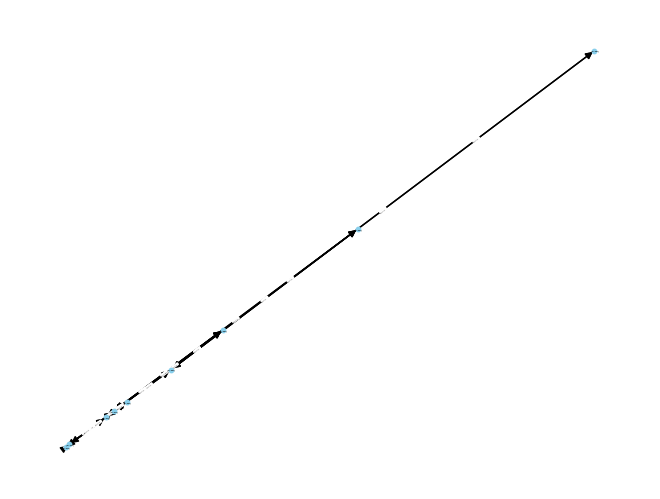

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/8808ab9df2724fccbe7838a467f2e087-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/8808ab9df2724fccbe7838a467f2e087-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 135 RHS
At line 146 BOUNDS
At line 176 ENDATA
Problem MODEL has 10 rows, 29 columns and 32 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Problem is infeasible - 0.00 seconds
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

The graph contains cycles. Removing cycles...
The time of execution of above program is : 0.3918731212615967


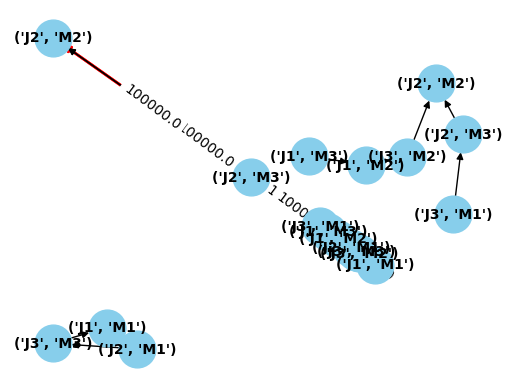

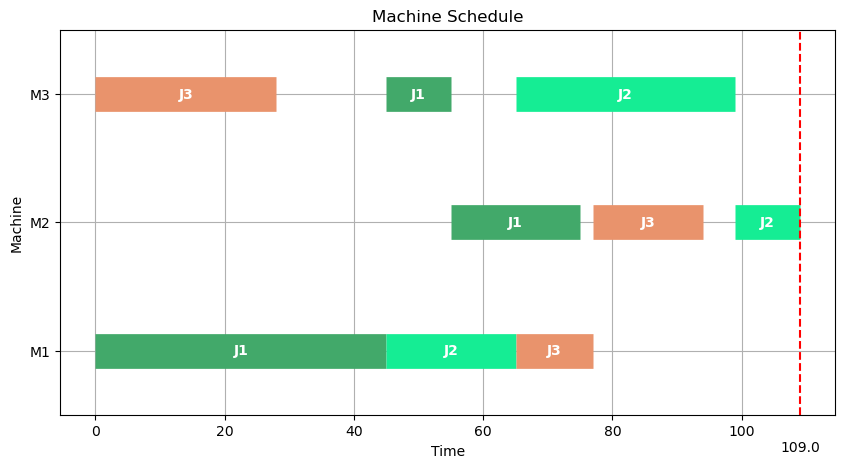

In [28]:
start = time.time()
def job_shop_scheduling_random_choose(TASKS):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    while TASKS:
        # Find tasks that can be scheduled
        schedulable_tasks = [task for task in TASKS if task['prec'] is None or task['prec'] in [(s[0], s[1]) for s in schedules]]

        if schedulable_tasks:
            next_task = random.choice(schedulable_tasks)
        else:
            # If no schedulable tasks, break the loop to avoid infinite loop
            break

        job, machine = next_task['job'], next_task['machine']
        start_time = max(job_times[job], machine_times[machine])
        end_time = start_time + next_task['dur']
        schedule = (job, machine, start_time, end_time)
        job_times[job] = end_time
        machine_times[machine] = end_time
        schedules.append(schedule)
        TASKS.remove(next_task)

    return schedules

def sampling_jss(TASKS , rev):
  all_schedules = {}
  for i in range(rev):
    # Make a copy of the original_TASKS to use in each example
    task = TASKS.copy()
    example_schedule = job_shop_scheduling_random_choose(task)

    # Store the schedule in the dictionary with the example number as the key
    all_schedules[i] = example_schedule
  return all_schedules

# Create an empty list to store scheduling information
scheduling_info = []

# Iterate through the schedules and add them to the list
####################################### Input HERE !!! #################################################
for example, schedule in sampling_jss(original_TASKS,1000).items():
    for step, (job, machine, start_time, end_time) in enumerate(schedule, start=1):
        scheduling_info.append({'Example': example, 'Job': job, 'Machine': machine, 'Start Time': start_time, 'End Time': end_time})
df = pd.DataFrame(scheduling_info)

# Convert the "End Time" column to numeric
df['End Time'] = pd.to_numeric(df['End Time'])

# Group the DataFrame by the "Example" column
grouped = df.groupby('Example')

# Initialize empty lists to store results
max_end_times = []
job_machine_sequences = []

# Iterate through each example group
for example, group in grouped:
    # Find the index of the maximum end time for this example
    max_end_time_index = group['End Time'].idxmax()

    # Get all job and machine sequences for this example
    sequences = group[['Job', 'Machine']].values.tolist()

    # Append the results to the lists
    max_end_times.append(group.loc[max_end_time_index, 'End Time'])
    job_machine_sequences.append(sequences)

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Example': grouped.groups.keys(), 'Max_End_Time': max_end_times, 'Job_Machine_Sequences': job_machine_sequences})

result_df['Job_Machine_Sequences'] = result_df['Job_Machine_Sequences'].apply(lambda x: tuple(map(tuple, x)))

# Drop duplicates
result_df = result_df.drop_duplicates(subset=['Max_End_Time', 'Job_Machine_Sequences'])

# Sort the DataFrame by the "Min_End_Time" column in ascending order
sorted_df = result_df.copy().sort_values(by='Max_End_Time', ascending=True)

# Get the top 30 minimum end times and their associated sequences
top_min_end_times= sorted_df.head(15)
top_min_end_times = top_min_end_times[['Example' , 'Max_End_Time' , 'Job_Machine_Sequences']]
top_min_end_times_example = top_min_end_times['Example'].values
top_min_end_times['Weight'] = round(max(top_min_end_times['Max_End_Time'])*100000/top_min_end_times['Max_End_Time'],2)

print(top_min_end_times)
# Create a directed graph from your data
G = nx.DiGraph()

# Initialize a defaultdict to store aggregated weights for all pairs of nodes
aggregated_weights = defaultdict(float)

# Add edges with weights
for idx, row in top_min_end_times.iterrows():
    job_machine_sequence = row['Job_Machine_Sequences']
    weight = row['Weight']
    # Iterate through each consecutive pair of job-machine pairs in the sequence
    for i in range(len(job_machine_sequence) - 1):
        pair1 = job_machine_sequence[i]
        pair2 = job_machine_sequence[i + 1]
        # Form unique keys for the pairs to store aggregated weights
        key = (pair1, pair2)
        # Add the weight to the aggregated weights dictionary for the pair of nodes
        aggregated_weights[key] += weight

# Add edges with aggregated weights
for pairs, weight_sum in aggregated_weights.items():
    pair1, pair2 = pairs
    G.add_edge(pair1, pair2, weight=weight_sum)

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', font_size=0.1, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_size=0.1)

# Show the graph
plt.show()

# Add edges with weights
for idx, row in top_min_end_times.iterrows():
    job_machine_sequence = row['Job_Machine_Sequences']
    weight = row['Weight']
    for i in range(len(job_machine_sequence) - 1):
        G.add_edge(job_machine_sequence[i], job_machine_sequence[i+1], weight=weight)

# Initialize PuLP problem
prob = pulp.LpProblem("Job_Shop_Scheduling", pulp.LpMaximize)

# Decision variables
x = pulp.LpVariable.dicts("start", G.edges(), cat='Binary')

# Objective function
prob += pulp.lpSum(x[(source, target)] * G[source][target]['weight'] for source, target in G.edges())

# Constraints
for node in G.nodes():
    # Each job starts exactly once
    prob += pulp.lpSum(x[(source, target)] for source, target in G.out_edges(node)) == 1

####################################### Input HERE !!! #################################################
# Find the first task with 'prec' attribute as None
first_task = next(task for task in original_TASKS if task['prec'] is None) ########## input

# Manually specify the initial node based on the first task
first_node = (first_task['job'], first_task['machine'])

# Add constraint to ensure the selected node is the starting node
prob += pulp.lpSum(x[(source, target)] for source, target in G.out_edges(first_node)) == 1

# Solve the problem
prob.solve()

# Print the status of the solution
#print("Status:", pulp.LpStatus[prob.status])

# Print the total profit
#print("Total Profit:", pulp.value(prob.objective))

# Draw the graph with solution
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw edges
selected_edges = [(source, target) for source, target in G.edges() if pulp.value(x[(source, target)]) > 0.5]
non_selected_edges = [(source, target) for source, target in G.edges() if pulp.value(x[(source, target)]) <= 0.5]

nx.draw_networkx_edges(G, pos, edgelist=selected_edges, edge_color='red', width=2)  # Selected edges
nx.draw_networkx_edges(G, pos, edgelist=non_selected_edges, edge_color='black', width=1)  # Non-selected edges

# Draw nodes and labels
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Show the graph
#plt.show()

# Extract the sequence of selected jobs from the solution
selected_jobs = [edge for edge in G.edges() if pulp.value(x[edge]) > 0.5]
#selected_jobs  = selected_jobs[0:-1]

# Create a new directed graph containing only the selected jobs
selected_graph = nx.DiGraph(selected_jobs)

# Draw the selected graph
pos = nx.spring_layout(selected_graph)  # Positions for all nodes
nx.draw(selected_graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(selected_graph, 'weight')
nx.draw_networkx_edge_labels(selected_graph, pos, edge_labels=edge_labels)

# Show the graph
#plt.show()

def get_sequence(order_assignment):
    G = nx.DiGraph()
    for pair in order_assignment:
        G.add_edge(pair[0], pair[1])

    # Check if the graph has cycles
    if not nx.is_directed_acyclic_graph(G):
        print("The graph contains cycles. Removing cycles...")
        cycles = list(nx.simple_cycles(G))
        # Break the cycles by removing edges
        for cycle in cycles:
            for i in range(len(cycle)):
                G.remove_edge(cycle[i], cycle[(i+1) % len(cycle)])  # Remove edges to break the cycle

    # Get the topological sort
    topological_order = list(nx.topological_sort(G))

    # Create a list of job-machine sequences
    sequences = [(topological_order[i]) for i in range(len(topological_order))]

    return sequences

sequence = get_sequence(selected_jobs)

def job_shop_scheduling_sequence(TASKS, sequence):
    machines = sorted(list(set(task['machine'] for task in TASKS)))
    jobs = sorted(list(set(task['job'] for task in TASKS)))

    job_times = {job: 0 for job in jobs}
    machine_times = {machine: 0 for machine in machines}
    schedules = []

    for task_pair in sequence:
        job, machine = task_pair
        next_task = next((task for task in TASKS if task['job'] == job and task['machine'] == machine), None)

        if next_task:
            start_time = max(job_times[job], machine_times[machine])
            end_time = start_time + next_task['dur']
            schedule = (job, machine, start_time, end_time)
            job_times[job] = end_time
            machine_times[machine] = end_time
            schedules.append(schedule)
            TASKS.remove(next_task)

    return schedules
####################################### Input HERE !!! #################################################
result_schedules = job_shop_scheduling_sequence(original_TASKS.copy(), sequence)
end = time.time()
# visualization
def job_shop_scheduling_sequence_to_df(schedule_data):
    df_schedule = pd.DataFrame(schedule_data, columns=['Job', 'Machine', 'Start Time', 'End Time'])

# Add the 'Example' column
    df_schedule['Example'] = (df_schedule.groupby(['Job', 'Machine']).cumcount() + 1).astype(str)

# Reorder columns
    df_schedule = df_schedule[['Example', 'Job', 'Machine', 'Start Time', 'End Time']]

# Print the DataFrame
    return(df_schedule)

def generate_random_color():
    # Generate a random color in hexadecimal format
    return "#{:06x}".format(np.random.randint(0, 256**3))

# Plot this sequence
def visualize_gantt_chart_machine_sequence(df):
    MACHINES = sorted(list(df['Machine'].unique()))
    unique_jobs = df['Job'].unique()
    num_jobs = len(unique_jobs)
    makespan = df['End Time'].max()

    # Define a dictionary to map jobs to colors
    job_colors = {job: generate_random_color() for job in unique_jobs}

    plt.figure(figsize=(10, 5))

    bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
    text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

    df.sort_values(by=['Machine', 'Start Time'])
    df.set_index(['Machine', 'Job'], inplace=True)

    plt.title('Machine Schedule')
    plt.ylabel('Machine')
    plt.ylim(0.5, len(MACHINES) + 0.5)
    plt.yticks(range(1, 1 + len(MACHINES)), MACHINES)

    for mdx, m in enumerate(MACHINES, 1):
        for jdx, j in enumerate(unique_jobs, 1):
            if (m, j) in df.index:
                xs = df.loc[(m, j), 'Start Time']
                xf = df.loc[(m, j), 'End Time']

                # Get the color for the current job
                job_color = job_colors.get(j, 'gray')  # Default to gray if not specified

                plt.plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                plt.text((xs + xf) / 2, mdx, j, **text_style)

    plt.text(makespan, plt.ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
    plt.plot([makespan] * 2, plt.ylim(), 'r--')
    plt.grid(True)

    plt.xlabel('Time')
    plt.show()

# Assuming df_sorted is your DataFrame
# To visualize all examples, use: visualize_gantt_chart_machine(df_sorted)
print("The time of execution of above program is :", end-start)
visualize_gantt_chart_machine_sequence(job_shop_scheduling_sequence_to_df(result_schedules))

# Run 100 solution

      Example  Max_End_Time  \
127       127            61   
1027     1027            63   
438       438            63   

                                  Job_Machine_Sequences     Weight  
127   ((J6, M2), (J3, M3), (J1, M3), (J1, M1), (J4, ...  103278.69  
1027  ((J5, M3), (J6, M2), (J6, M4), (J4, M2), (J2, ...  100000.00  
438   ((J1, M3), (J1, M1), (J6, M2), (J4, M2), (J6, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/ad118d4ccafe4305b01a4d996129cef0-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/ad118d4ccafe4305b01a4d996129cef0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 42 COLUMNS
At line 436 RHS
At line 474 BOUNDS
At line 573 ENDATA
Problem MODEL has 37 r

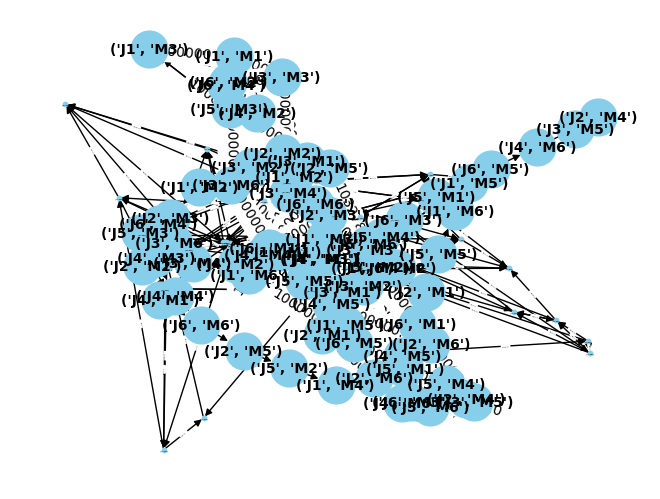

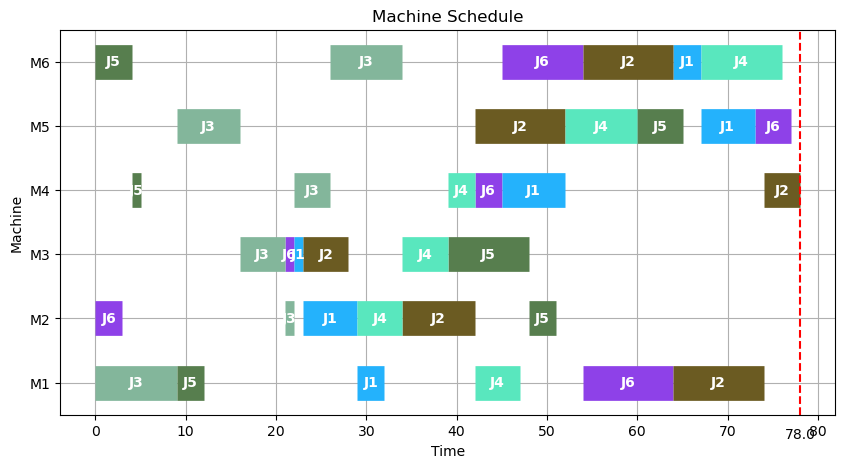

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
1323     1323            61   
2471     2471            63   
1503     1503            63   

                                  Job_Machine_Sequences     Weight  
1323  ((J1, M3), (J5, M3), (J6, M2), (J1, M1), (J4, ...  103278.69  
2471  ((J3, M3), (J4, M2), (J6, M2), (J1, M3), (J1, ...  100000.00  
1503  ((J4, M2), (J6, M2), (J4, M1), (J1, M3), (J2, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/18f236e234ce4b208e4800ea3a3d6a35-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/18f236e234ce4b208e4800ea3a3d6a35-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

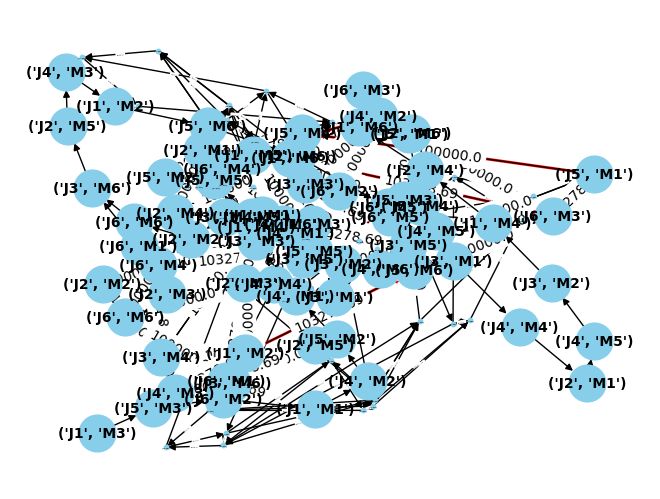

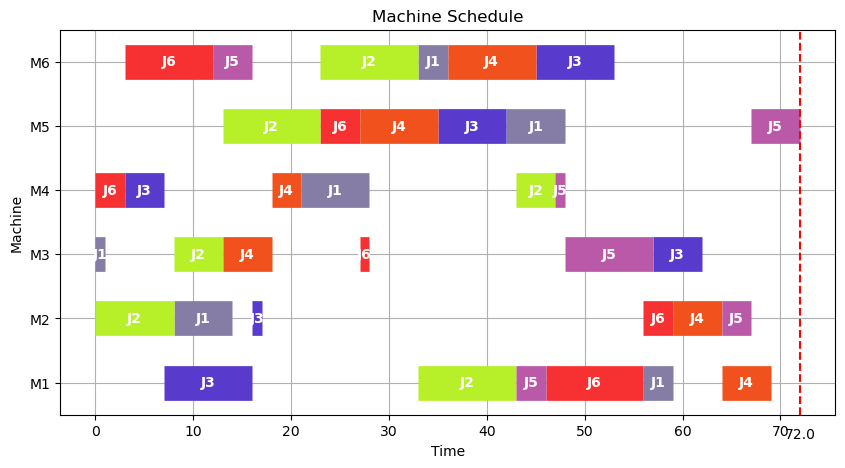

--------------------------------------------------------------------------------------------------------------
     Example  Max_End_Time                              Job_Machine_Sequences  \
445      445            62  ((J1, M3), (J1, M1), (J4, M2), (J6, M2), (J3, ...   
208      208            63  ((J3, M3), (J5, M3), (J3, M4), (J1, M3), (J2, ...   
624      624            64  ((J2, M2), (J5, M3), (J6, M2), (J6, M4), (J2, ...   

        Weight  
445  103225.81  
208  101587.30  
624  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/27650ba1819e4050ac44b3ecc329d82a-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/27650ba1819e4050ac44b3ecc329d82a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line

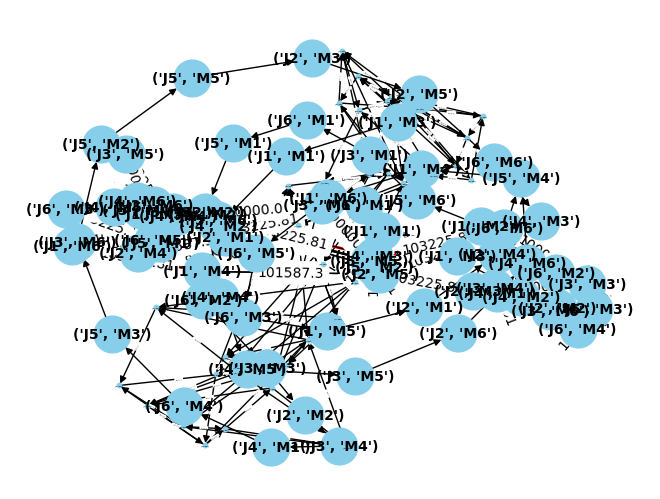

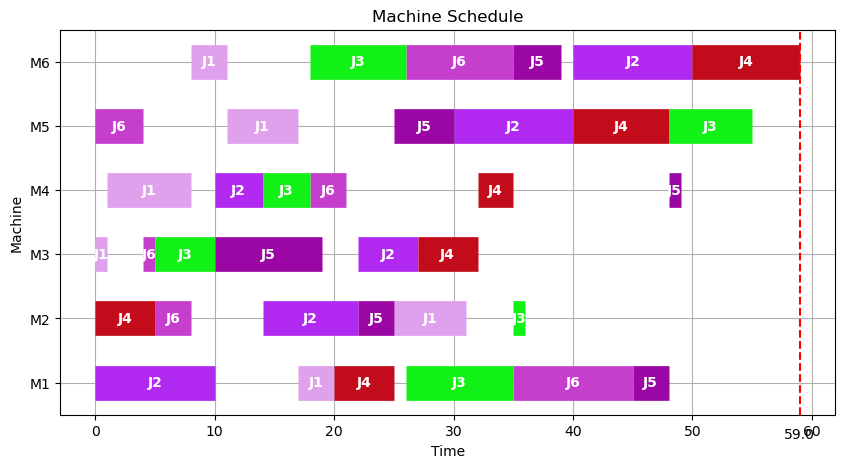

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
77         77            62   
220       220            64   
2348     2348            65   

                                  Job_Machine_Sequences     Weight  
77    ((J6, M2), (J3, M3), (J5, M3), (J2, M2), (J4, ...  104838.71  
220   ((J2, M2), (J1, M3), (J6, M2), (J4, M2), (J2, ...  101562.50  
2348  ((J2, M2), (J6, M2), (J5, M3), (J1, M3), (J5, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/334f076963de46e9a96f97ed66e35b43-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/334f076963de46e9a96f97ed66e35b43-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

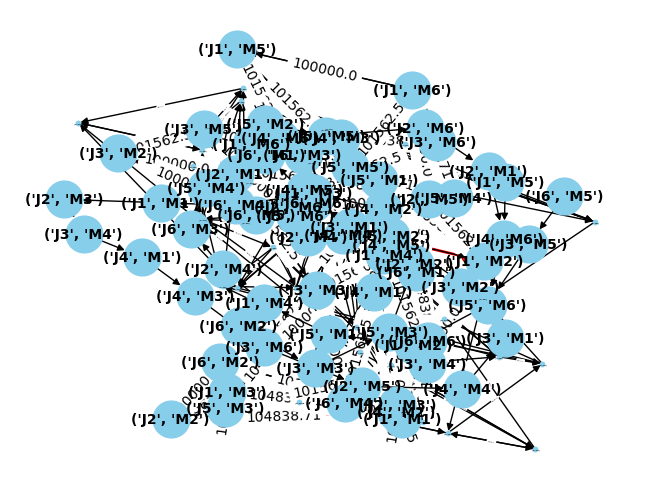

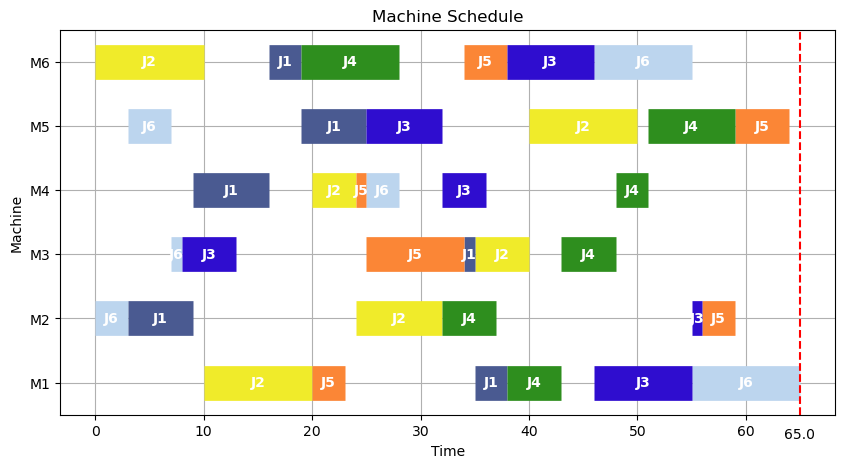

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
982       982            62   
1289     1289            63   
1200     1200            65   

                                  Job_Machine_Sequences     Weight  
982   ((J4, M2), (J3, M3), (J2, M2), (J3, M4), (J1, ...  104838.71  
1289  ((J4, M2), (J4, M1), (J1, M3), (J3, M3), (J5, ...  103174.60  
1200  ((J4, M2), (J4, M1), (J6, M2), (J2, M2), (J3, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/97fea454f6d9499d98e6940aff79f3da-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/97fea454f6d9499d98e6940aff79f3da-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

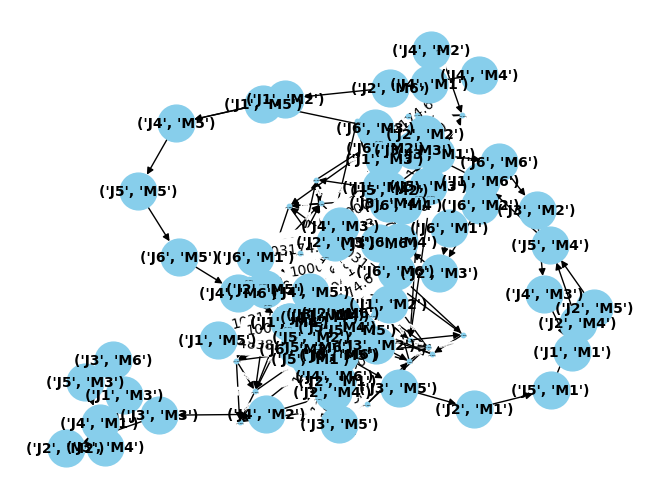

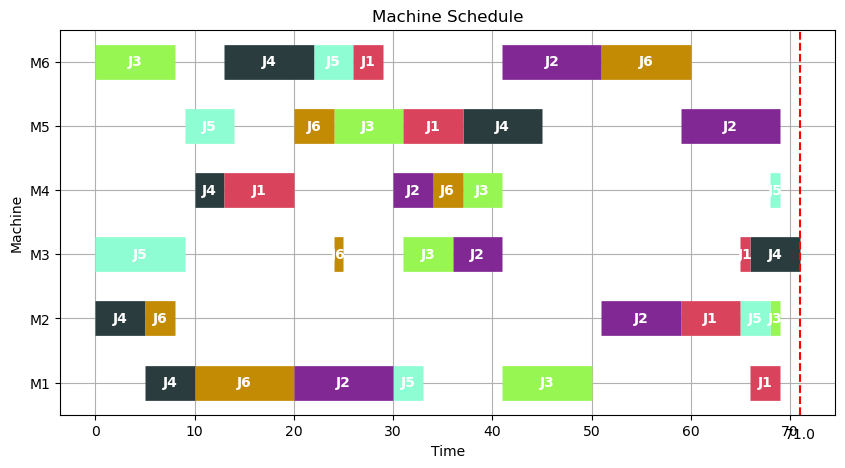

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
1161     1161            60   
2777     2777            61   
2243     2243            65   

                                  Job_Machine_Sequences     Weight  
1161  ((J3, M3), (J2, M2), (J3, M4), (J3, M6), (J2, ...  108333.33  
2777  ((J4, M2), (J3, M3), (J5, M3), (J2, M2), (J6, ...  106557.38  
2243  ((J2, M2), (J5, M3), (J5, M2), (J3, M3), (J2, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/432f5e0523494150a45542db2bfcca76-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/432f5e0523494150a45542db2bfcca76-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

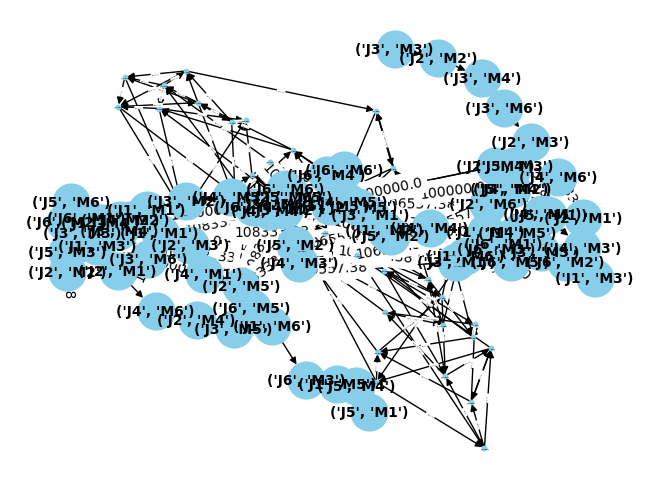

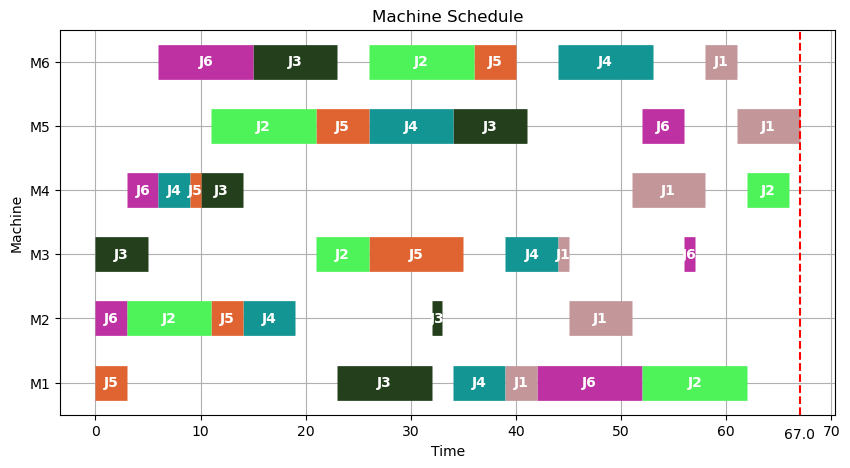

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
1383     1383            62   
1022     1022            63   
226       226            65   

                                  Job_Machine_Sequences     Weight  
1383  ((J3, M3), (J2, M2), (J6, M2), (J4, M2), (J6, ...  104838.71  
1022  ((J2, M2), (J6, M2), (J6, M4), (J2, M3), (J1, ...  103174.60  
226   ((J5, M3), (J2, M2), (J4, M2), (J4, M1), (J3, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/74a9e1c8845e426286dc465800ce9bee-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/74a9e1c8845e426286dc465800ce9bee-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

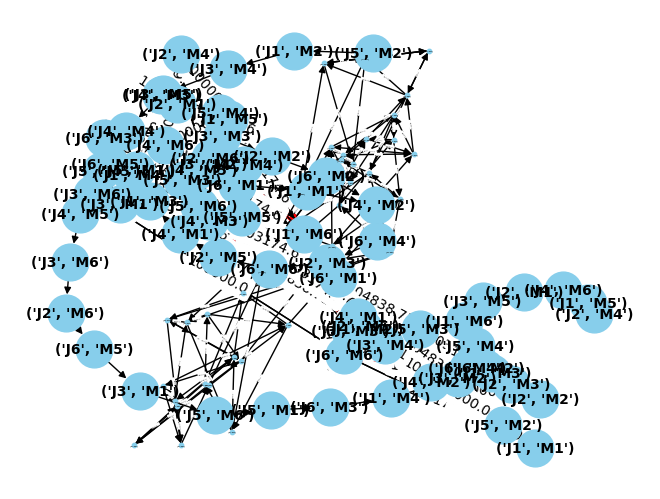

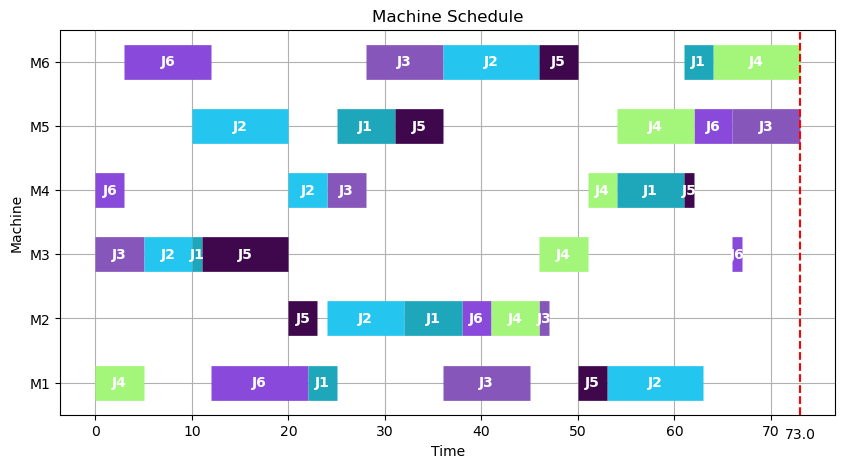

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
6           6            60   
2060     2060            61   
944       944            64   

                                  Job_Machine_Sequences     Weight  
6     ((J6, M2), (J6, M4), (J5, M3), (J6, M6), (J2, ...  106666.67  
2060  ((J6, M2), (J6, M4), (J5, M3), (J4, M2), (J4, ...  104918.03  
944   ((J4, M2), (J3, M3), (J5, M3), (J2, M2), (J5, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/9603468af7f3491d99ed8e462d910792-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/9603468af7f3491d99ed8e462d910792-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

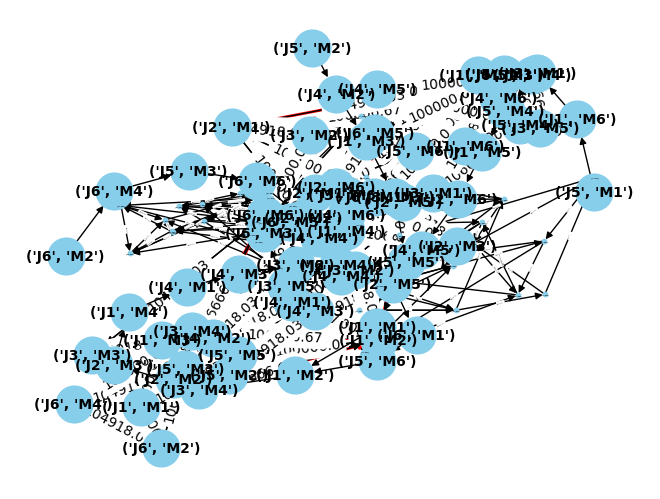

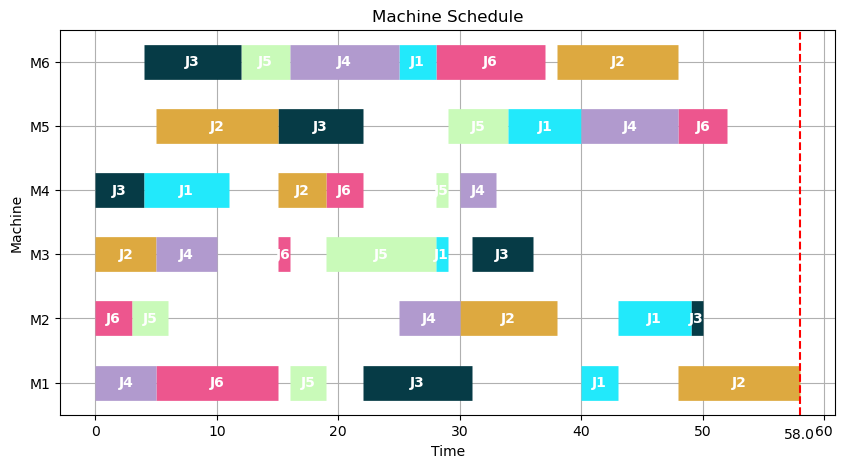

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
431       431            62   
1328     1328            64   
1605     1605            64   

                                  Job_Machine_Sequences     Weight  
431   ((J6, M2), (J1, M3), (J2, M2), (J4, M2), (J3, ...  103225.81  
1328  ((J6, M2), (J1, M3), (J6, M4), (J6, M6), (J5, ...  100000.00  
1605  ((J3, M3), (J4, M2), (J3, M4), (J2, M2), (J1, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/6a05cfdcbffe4c29bf4188205c5d13c7-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/6a05cfdcbffe4c29bf4188205c5d13c7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

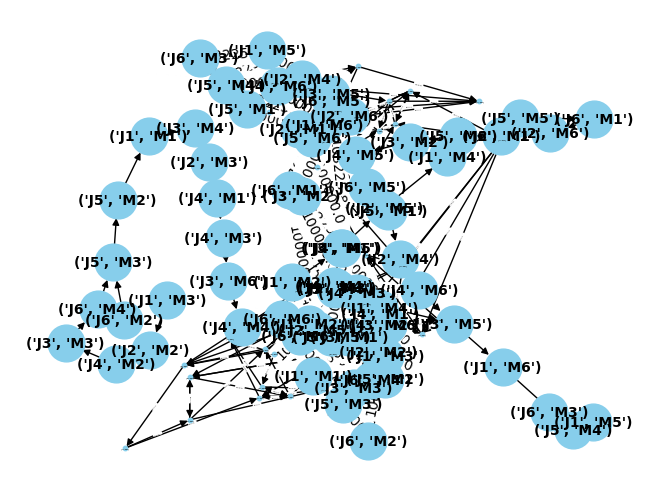

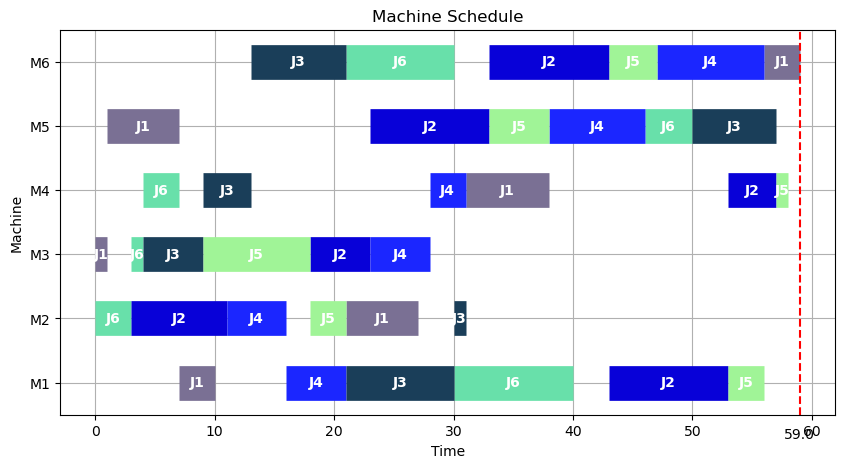

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2704     2704            65   
1566     1566            66   
2295     2295            66   

                                  Job_Machine_Sequences     Weight  
2704  ((J6, M2), (J2, M2), (J4, M2), (J1, M3), (J6, ...  101538.46  
1566  ((J3, M3), (J6, M2), (J5, M3), (J4, M2), (J4, ...  100000.00  
2295  ((J5, M3), (J6, M2), (J3, M3), (J4, M2), (J1, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/3944b3541e404be89360ae4ca69d9418-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/3944b3541e404be89360ae4ca69d9418-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

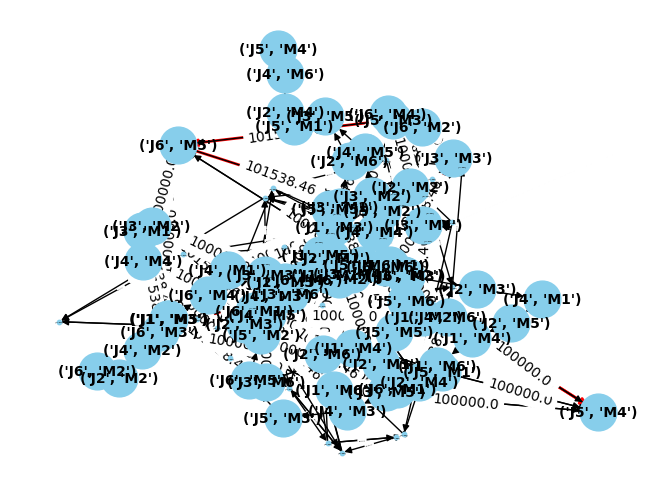

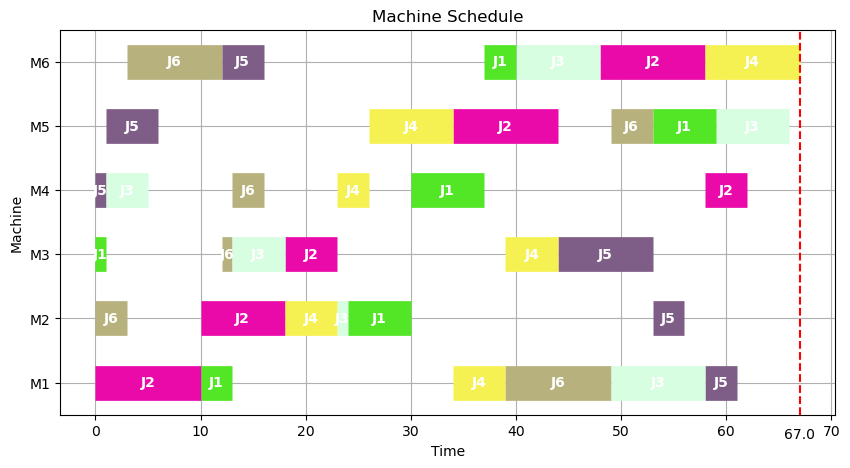

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
799       799            63   
2685     2685            64   
1105     1105            64   

                                  Job_Machine_Sequences    Weight  
799   ((J5, M3), (J4, M2), (J4, M1), (J3, M3), (J5, ...  101587.3  
2685  ((J2, M2), (J3, M3), (J1, M3), (J4, M2), (J1, ...  100000.0  
1105  ((J3, M3), (J4, M2), (J6, M2), (J1, M3), (J4, ...  100000.0  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/07193dd6df124261bb113cb42a864ef6-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/07193dd6df124261bb113cb42a864ef6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At 

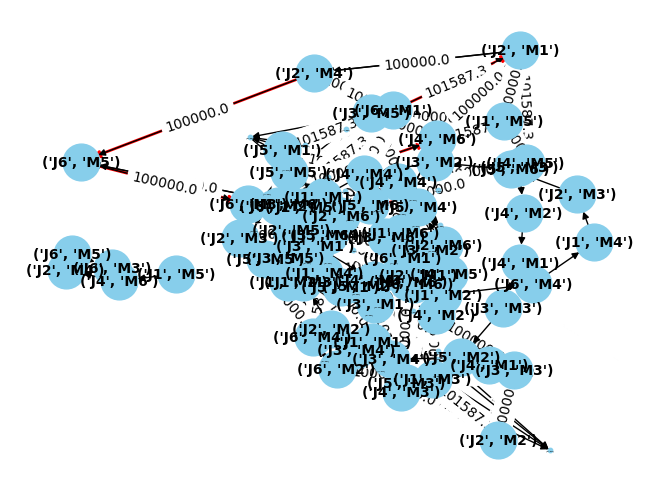

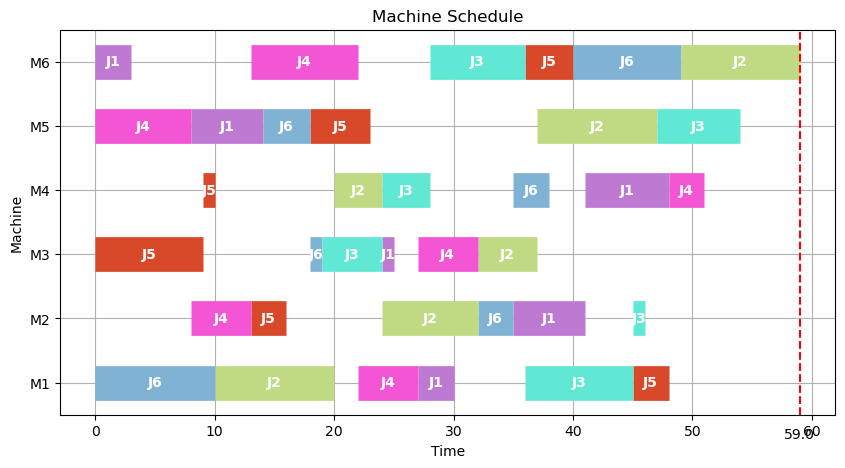

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
1103     1103            63   
1809     1809            63   
2329     2329            63   

                                  Job_Machine_Sequences    Weight  
1103  ((J5, M3), (J1, M3), (J3, M3), (J6, M2), (J2, ...  100000.0  
1809  ((J4, M2), (J5, M3), (J3, M3), (J5, M2), (J6, ...  100000.0  
2329  ((J6, M2), (J2, M2), (J3, M3), (J3, M4), (J5, ...  100000.0  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/88df90d3fa684d5db95ee9831d77f181-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/88df90d3fa684d5db95ee9831d77f181-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At 

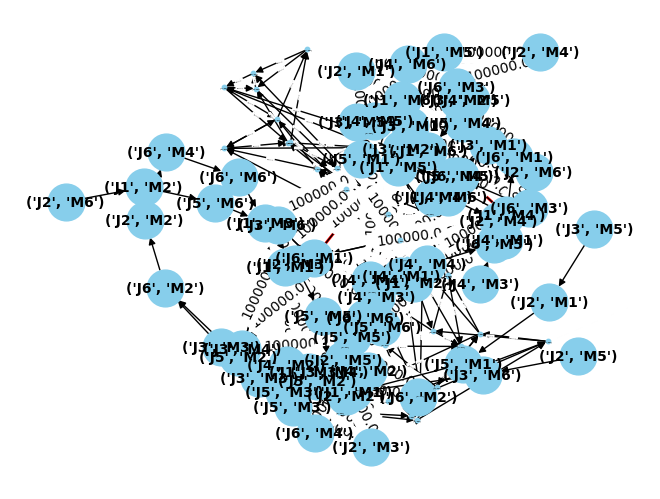

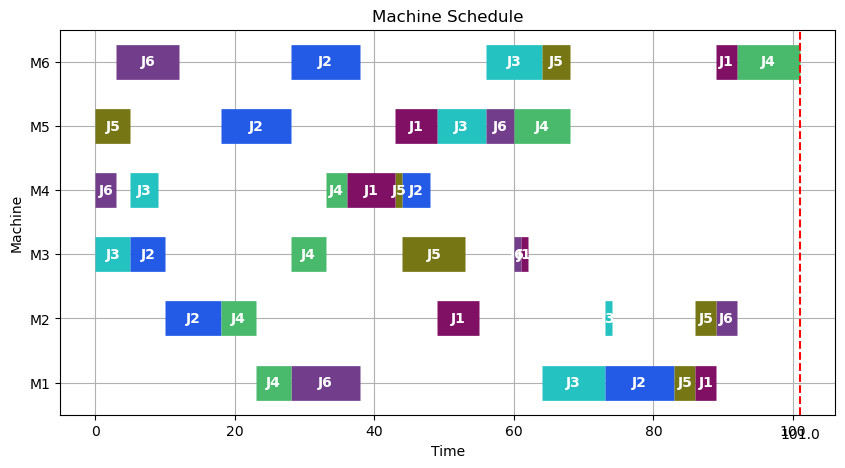

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2916     2916            61   
1403     1403            61   
2019     2019            63   

                                  Job_Machine_Sequences     Weight  
2916  ((J4, M2), (J6, M2), (J3, M3), (J3, M4), (J5, ...  103278.69  
1403  ((J3, M3), (J1, M3), (J6, M2), (J3, M4), (J1, ...  103278.69  
2019  ((J4, M2), (J6, M2), (J3, M3), (J4, M1), (J1, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/6382b41cfff14c96bb24075c7c5aa975-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/6382b41cfff14c96bb24075c7c5aa975-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

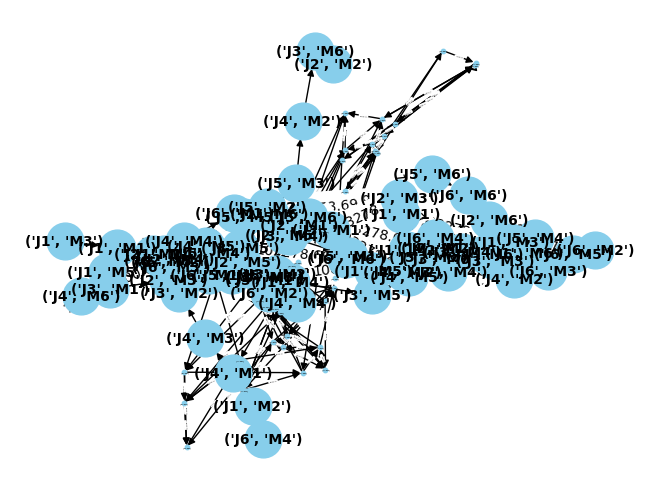

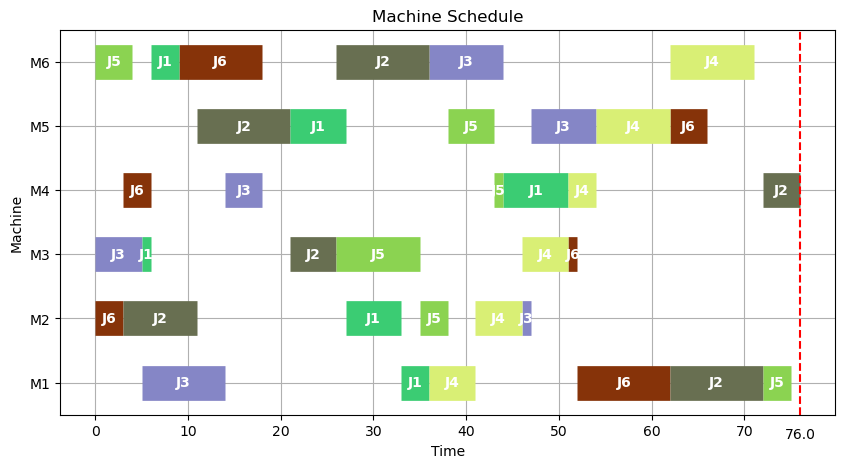

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2003     2003            62   
181       181            63   
1075     1075            64   

                                  Job_Machine_Sequences     Weight  
2003  ((J4, M2), (J3, M3), (J1, M3), (J1, M1), (J3, ...  103225.81  
181   ((J2, M2), (J3, M3), (J3, M4), (J5, M3), (J2, ...  101587.30  
1075  ((J3, M3), (J2, M2), (J3, M4), (J1, M3), (J6, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/117157f4e37145fe8b21bb5424c503a2-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/117157f4e37145fe8b21bb5424c503a2-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

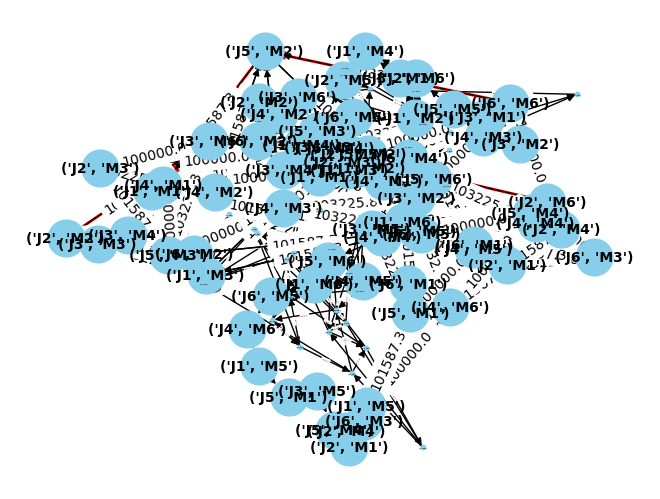

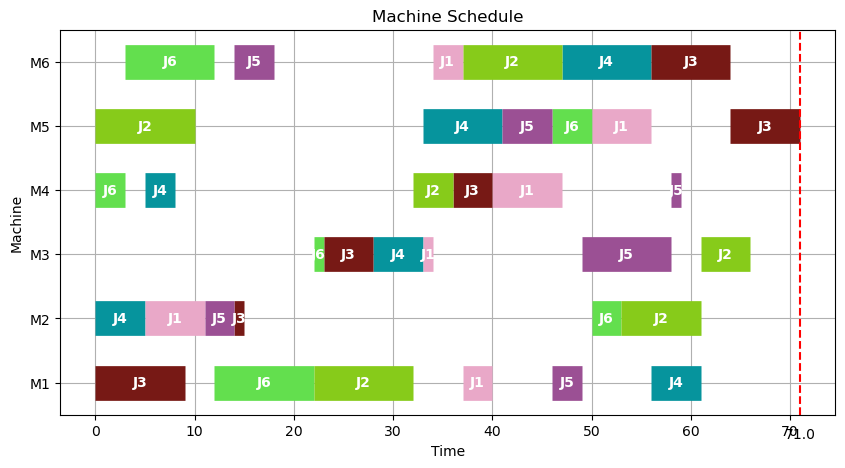

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2176     2176            61   
2479     2479            63   
1547     1547            64   

                                  Job_Machine_Sequences     Weight  
2176  ((J3, M3), (J3, M4), (J4, M2), (J3, M6), (J6, ...  104918.03  
2479  ((J4, M2), (J4, M1), (J3, M3), (J3, M4), (J6, ...  101587.30  
1547  ((J4, M2), (J1, M3), (J6, M2), (J1, M1), (J4, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/eaf6b7e7fb794503bc254677af635e09-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/eaf6b7e7fb794503bc254677af635e09-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

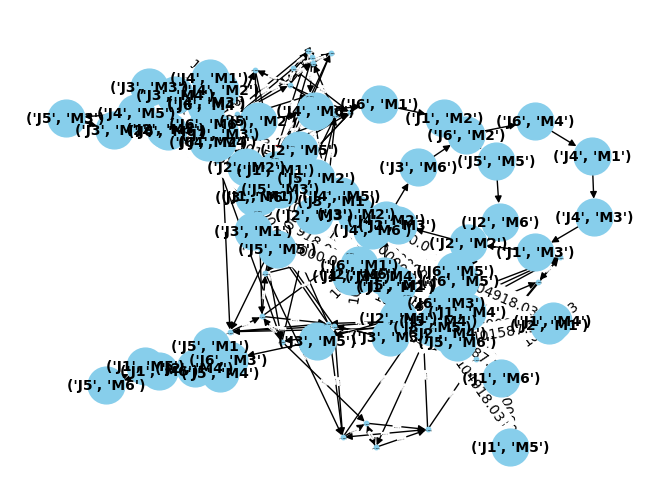

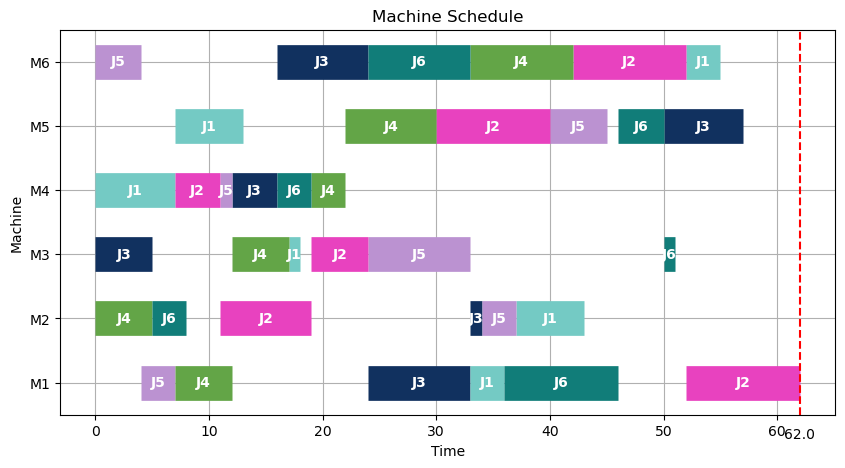

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
1548     1548            61   
2587     2587            61   
2093     2093            62   

                                  Job_Machine_Sequences     Weight  
1548  ((J3, M3), (J3, M4), (J6, M2), (J4, M2), (J3, ...  101639.34  
2587  ((J3, M3), (J6, M2), (J1, M3), (J2, M2), (J6, ...  101639.34  
2093  ((J2, M2), (J3, M3), (J6, M2), (J5, M3), (J4, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/1a48864a12e44f29a6636f9bf73ea1c8-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/1a48864a12e44f29a6636f9bf73ea1c8-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

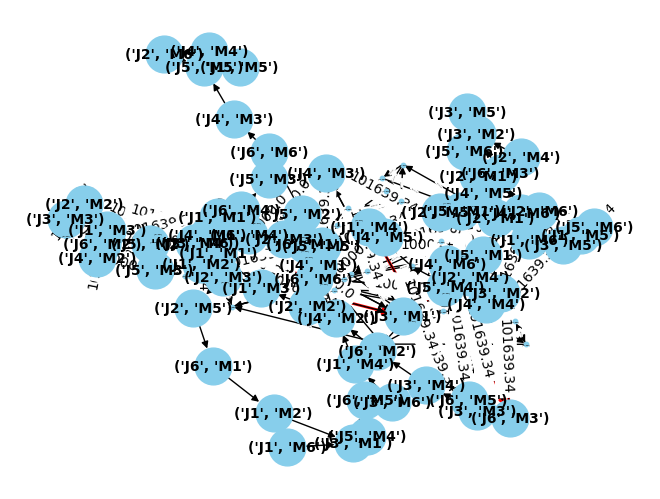

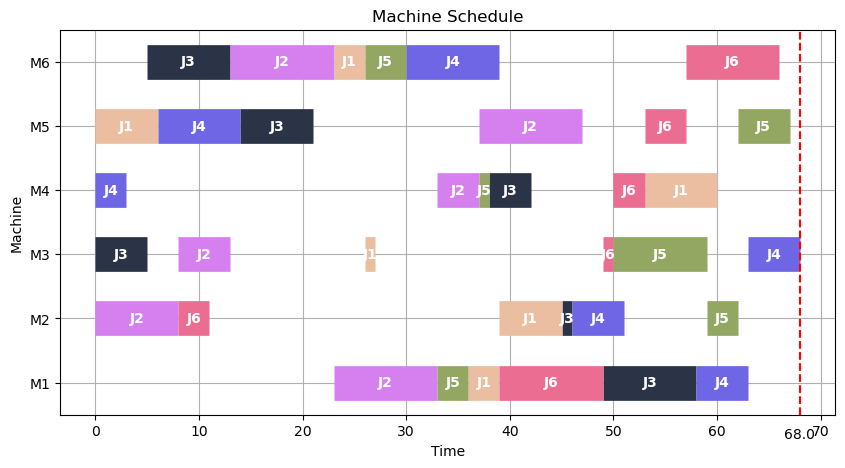

--------------------------------------------------------------------------------------------------------------
     Example  Max_End_Time                              Job_Machine_Sequences  \
329      329            61  ((J6, M2), (J4, M2), (J6, M4), (J1, M3), (J2, ...   
615      615            62  ((J6, M2), (J2, M2), (J4, M2), (J5, M3), (J3, ...   
539      539            63  ((J6, M2), (J3, M3), (J4, M2), (J5, M3), (J6, ...   

        Weight  
329  103278.69  
615  101612.90  
539  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/30a81d9c18bb4e77bda35b17aa12d57b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/30a81d9c18bb4e77bda35b17aa12d57b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line

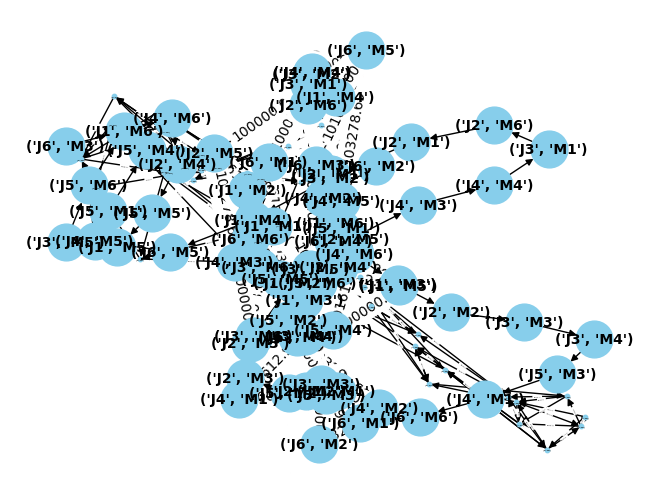

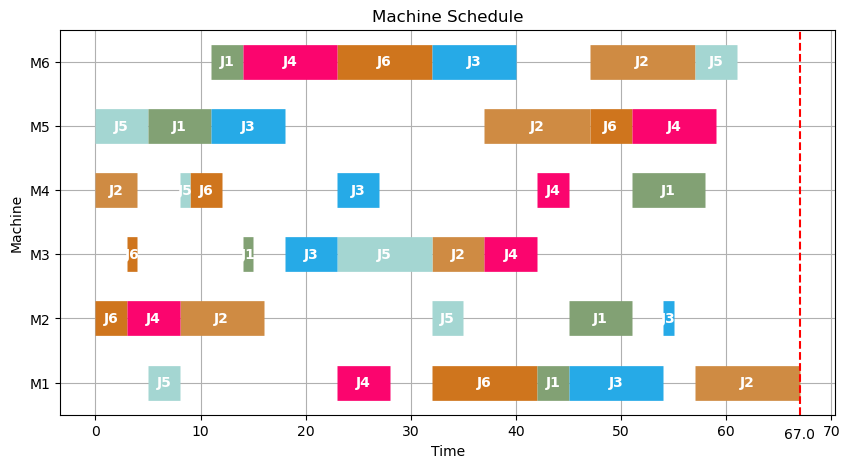

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2423     2423            61   
1845     1845            62   
2931     2931            63   

                                  Job_Machine_Sequences     Weight  
2423  ((J1, M3), (J3, M3), (J2, M2), (J4, M2), (J3, ...  103278.69  
1845  ((J3, M3), (J1, M3), (J4, M2), (J5, M3), (J2, ...  101612.90  
2931  ((J3, M3), (J4, M2), (J3, M4), (J3, M6), (J4, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/d228873c33f14791acd67f864e8ead3f-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/d228873c33f14791acd67f864e8ead3f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

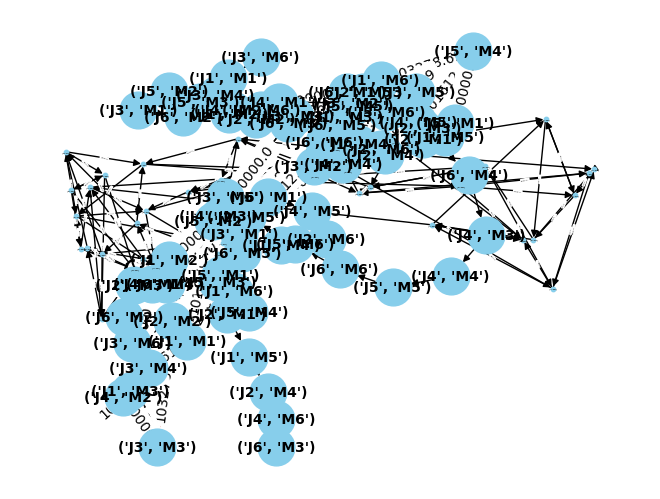

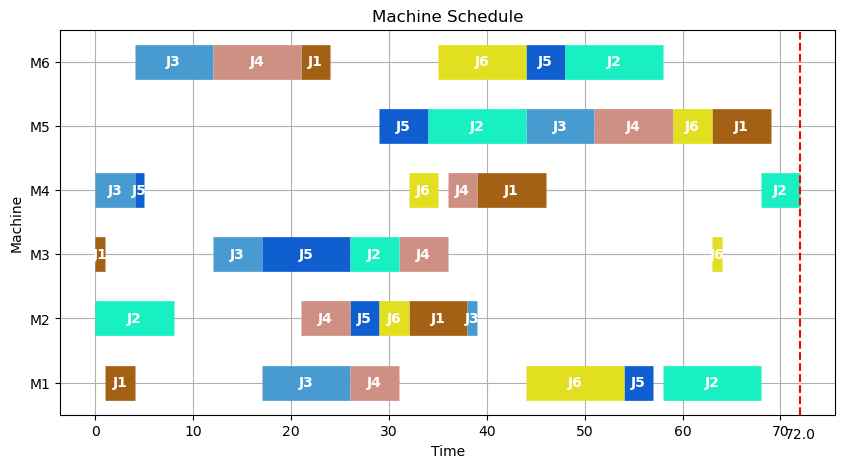

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2103     2103            61   
258       258            63   
2115     2115            63   

                                  Job_Machine_Sequences     Weight  
2103  ((J1, M3), (J1, M1), (J3, M3), (J2, M2), (J3, ...  103278.69  
258   ((J5, M3), (J2, M2), (J1, M3), (J2, M3), (J1, ...  100000.00  
2115  ((J3, M3), (J4, M2), (J1, M3), (J2, M2), (J4, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/043ea2dd87e44aa0ac1c28cef9d185f0-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/043ea2dd87e44aa0ac1c28cef9d185f0-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

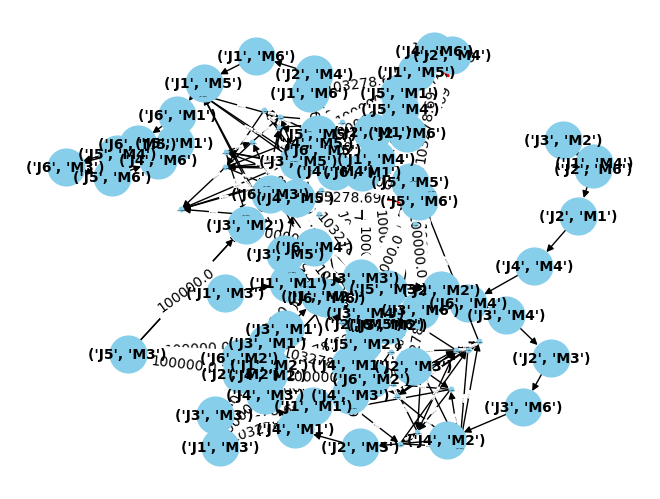

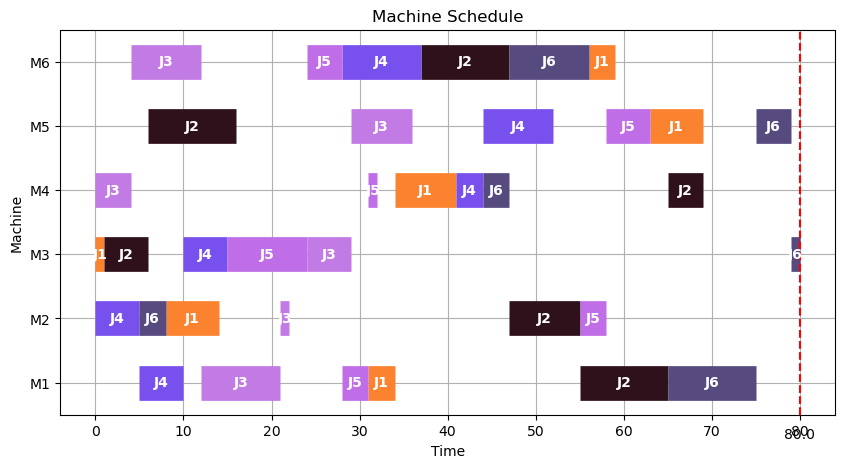

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2118     2118            62   
1201     1201            64   
1660     1660            65   

                                  Job_Machine_Sequences     Weight  
2118  ((J6, M2), (J4, M2), (J6, M4), (J1, M3), (J4, ...  104838.71  
1201  ((J1, M3), (J6, M2), (J1, M1), (J6, M4), (J2, ...  101562.50  
1660  ((J3, M3), (J1, M3), (J4, M2), (J6, M2), (J2, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/645f8c0ffad245d6a360e468ec88f9cf-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/645f8c0ffad245d6a360e468ec88f9cf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

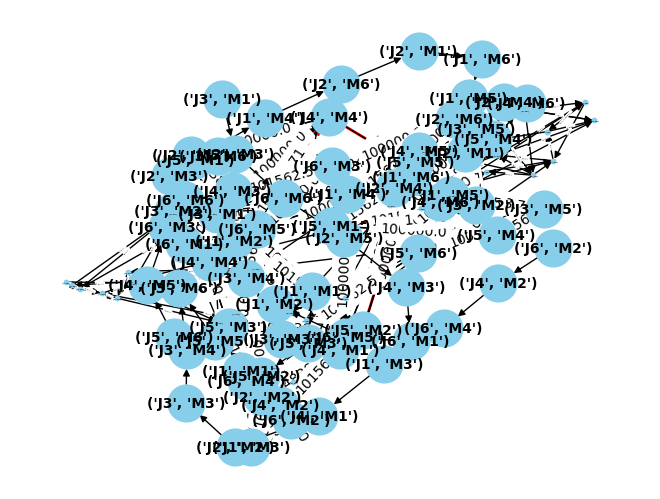

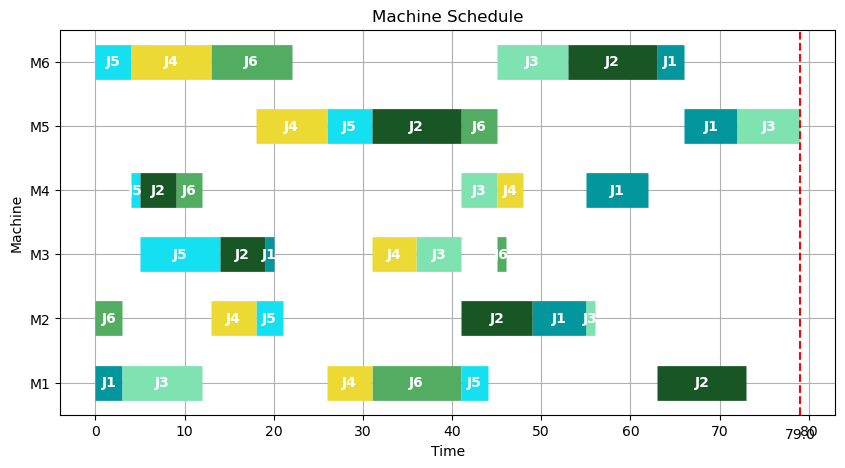

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
67         67            61   
765       765            62   
1831     1831            63   

                                  Job_Machine_Sequences     Weight  
67    ((J3, M3), (J1, M3), (J2, M2), (J4, M2), (J3, ...  103278.69  
765   ((J3, M3), (J3, M4), (J2, M2), (J6, M2), (J3, ...  101612.90  
1831  ((J6, M2), (J6, M4), (J3, M3), (J4, M2), (J2, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/e99524824add45bbaaa90787afd03944-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/e99524824add45bbaaa90787afd03944-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

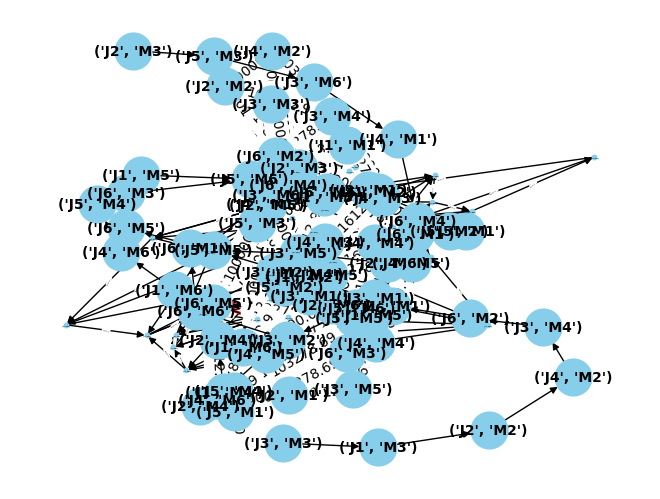

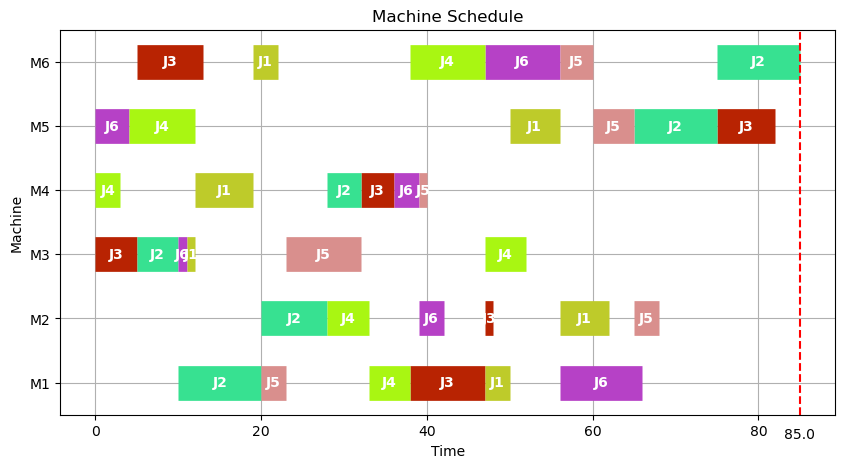

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
376       376            63   
1786     1786            64   
1906     1906            64   

                                  Job_Machine_Sequences    Weight  
376   ((J6, M2), (J3, M3), (J6, M4), (J1, M3), (J1, ...  101587.3  
1786  ((J3, M3), (J1, M3), (J2, M2), (J3, M4), (J4, ...  100000.0  
1906  ((J2, M2), (J6, M2), (J3, M3), (J2, M3), (J1, ...  100000.0  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/e53a07752f5944ad9a819028365801fb-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/e53a07752f5944ad9a819028365801fb-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At 

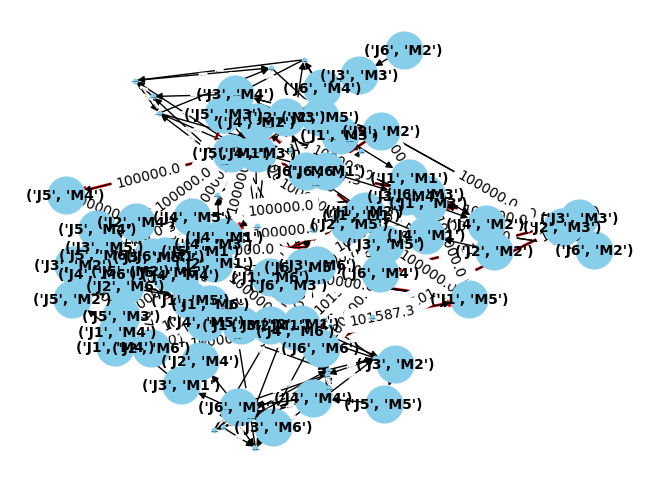

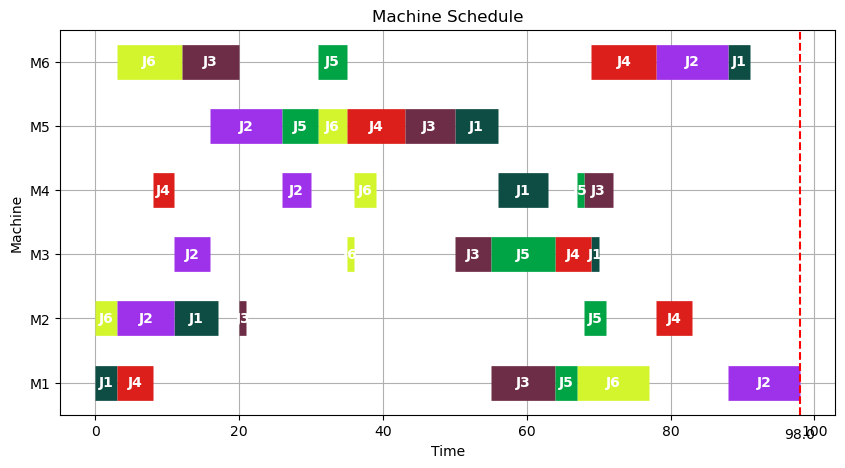

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2953     2953            61   
464       464            62   
2859     2859            64   

                                  Job_Machine_Sequences     Weight  
2953  ((J3, M3), (J4, M2), (J3, M4), (J6, M2), (J1, ...  104918.03  
464   ((J4, M2), (J2, M2), (J1, M3), (J3, M3), (J6, ...  103225.81  
2859  ((J1, M3), (J4, M2), (J6, M2), (J5, M3), (J5, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/2337b45ce72f46e391e06bfbe51b1501-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/2337b45ce72f46e391e06bfbe51b1501-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

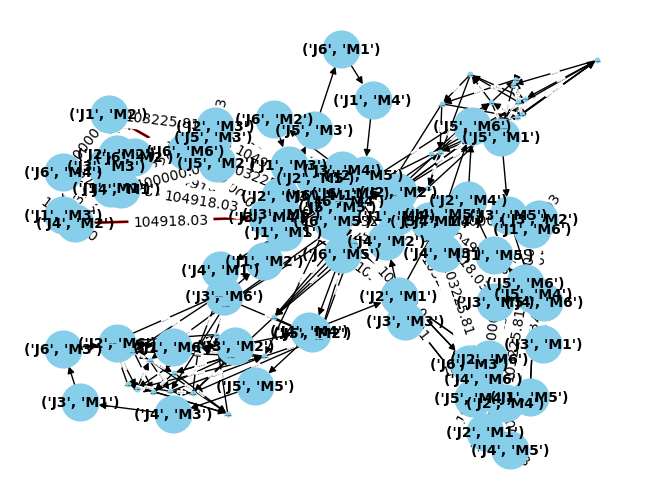

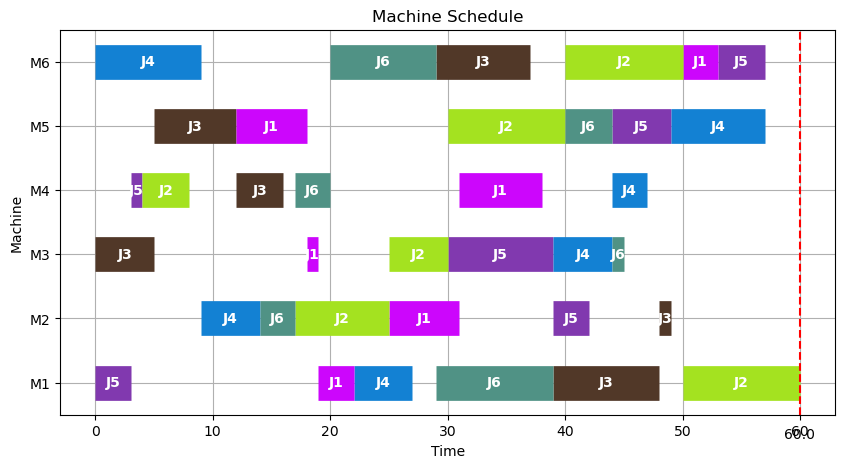

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2620     2620            59   
1347     1347            63   
881       881            63   

                                  Job_Machine_Sequences     Weight  
2620  ((J3, M3), (J6, M2), (J5, M3), (J1, M3), (J3, ...  106779.66  
1347  ((J6, M2), (J1, M3), (J2, M2), (J5, M3), (J5, ...  100000.00  
881   ((J6, M2), (J1, M3), (J1, M1), (J6, M4), (J2, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/d82b40519f7b44f4b76747931737eba7-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/d82b40519f7b44f4b76747931737eba7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

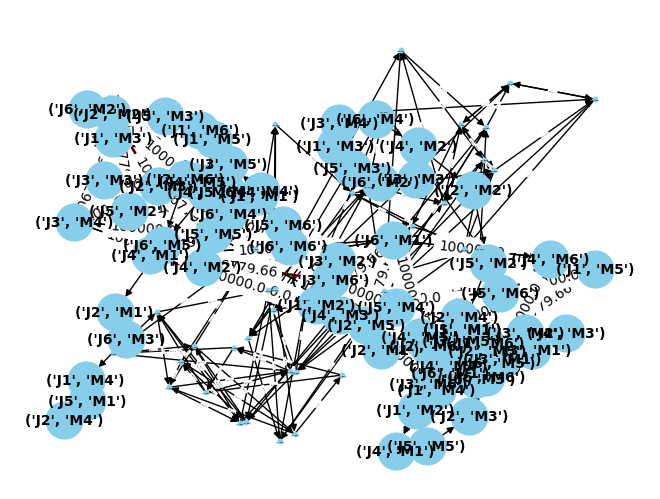

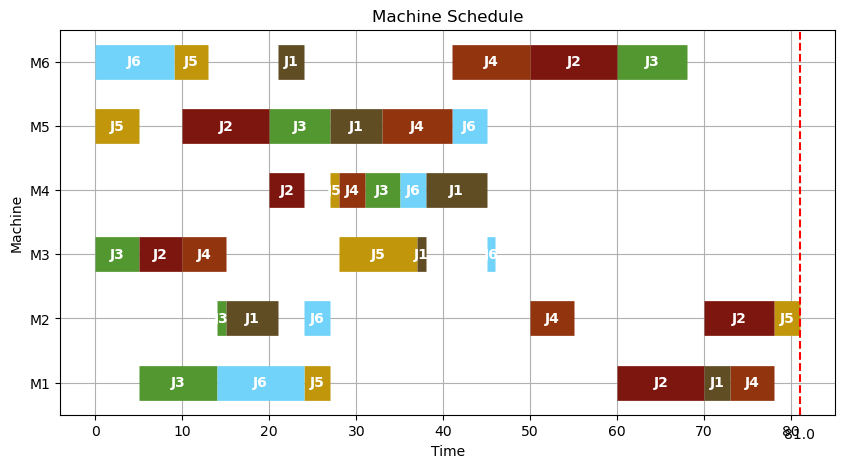

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
0           0            64   
1838     1838            64   
1036     1036            65   

                                  Job_Machine_Sequences    Weight  
0     ((J3, M3), (J6, M2), (J6, M4), (J1, M3), (J3, ...  101562.5  
1838  ((J3, M3), (J3, M4), (J2, M2), (J1, M3), (J1, ...  101562.5  
1036  ((J1, M3), (J3, M3), (J3, M4), (J1, M1), (J6, ...  100000.0  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/a04206342a2343598b874f9fd9de1ae3-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/a04206342a2343598b874f9fd9de1ae3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At 

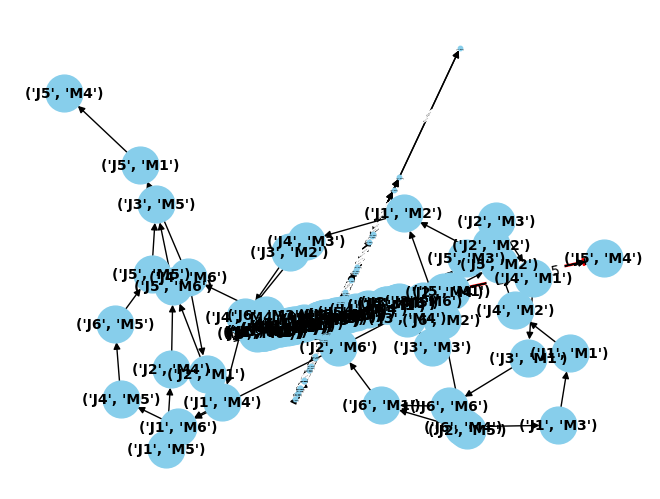

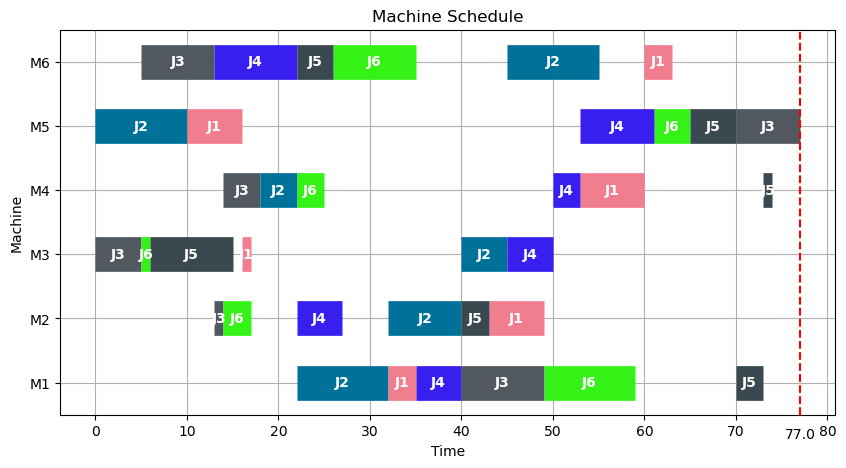

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
2519     2519            61   
1100     1100            61   
868       868            61   

                                  Job_Machine_Sequences    Weight  
2519  ((J1, M3), (J4, M2), (J4, M1), (J2, M2), (J1, ...  100000.0  
1100  ((J1, M3), (J1, M1), (J3, M3), (J2, M2), (J3, ...  100000.0  
868   ((J6, M2), (J3, M3), (J3, M4), (J5, M3), (J6, ...  100000.0  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/33852b5c684d4d848ceec0fcc27e8993-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/33852b5c684d4d848ceec0fcc27e8993-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At 

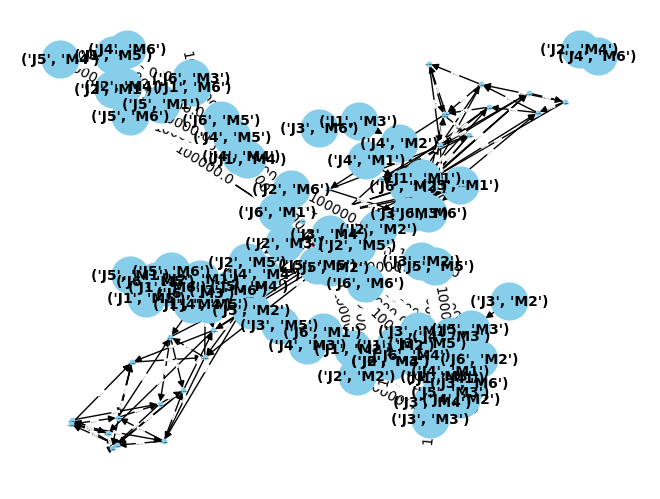

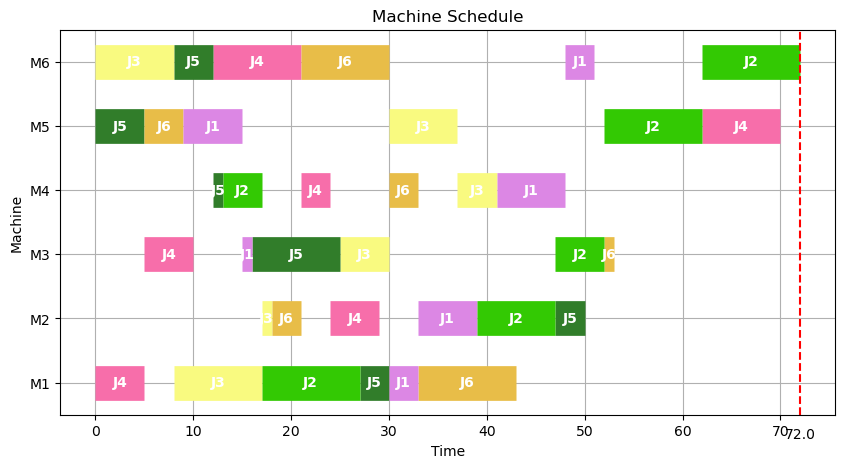

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
266       266            59   
1082     1082            61   
1928     1928            64   

                                  Job_Machine_Sequences     Weight  
266   ((J5, M3), (J6, M2), (J2, M2), (J5, M2), (J6, ...  108474.58  
1082  ((J3, M3), (J4, M2), (J6, M2), (J2, M2), (J3, ...  104918.03  
1928  ((J6, M2), (J6, M4), (J3, M3), (J1, M3), (J4, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/ee2ea68316d64319a7e969ce437601d9-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/ee2ea68316d64319a7e969ce437601d9-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

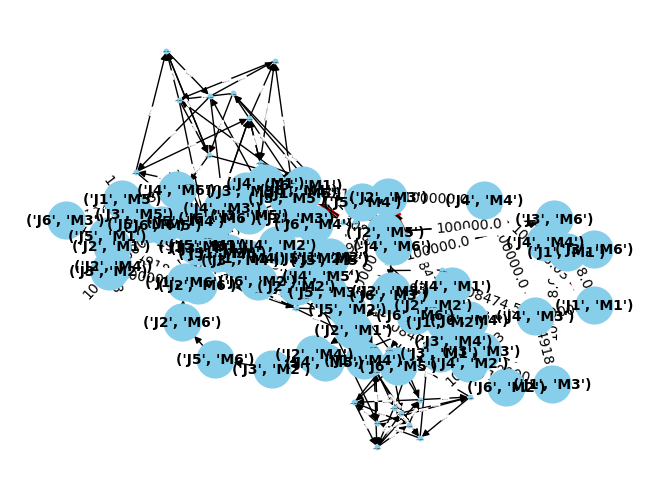

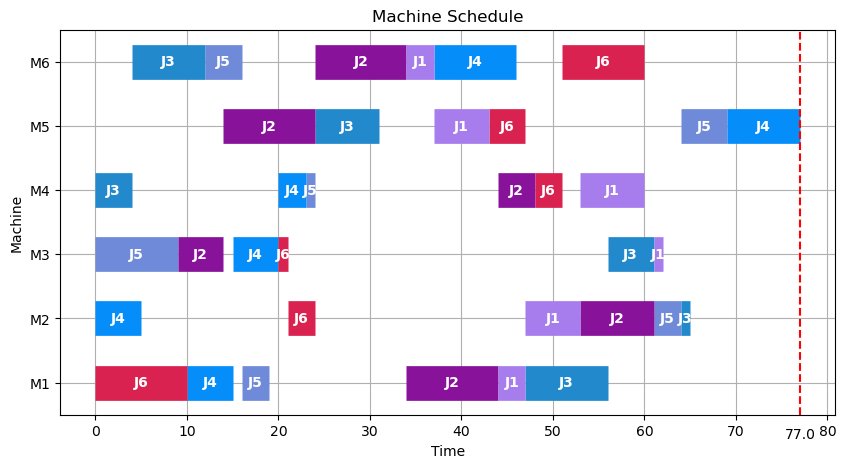

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
436       436            62   
2204     2204            63   
2557     2557            64   

                                  Job_Machine_Sequences     Weight  
436   ((J5, M3), (J1, M3), (J2, M2), (J3, M3), (J2, ...  103225.81  
2204  ((J6, M2), (J6, M4), (J6, M6), (J5, M3), (J5, ...  101587.30  
2557  ((J5, M3), (J1, M3), (J1, M1), (J4, M2), (J3, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/d5034586d92a4810abb95c0d1993ad8b-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/d5034586d92a4810abb95c0d1993ad8b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

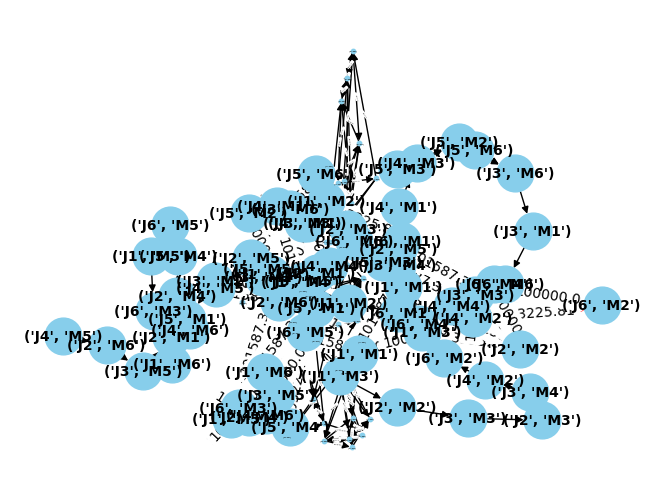

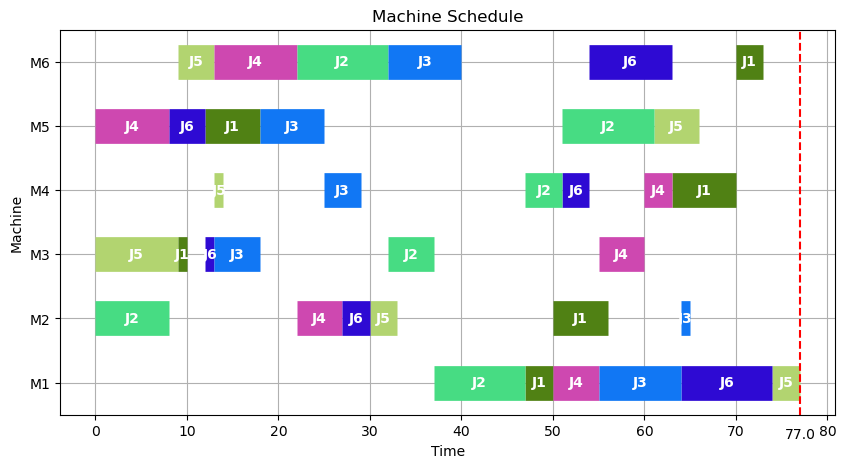

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
456       456            60   
1470     1470            62   
1316     1316            64   

                                  Job_Machine_Sequences     Weight  
456   ((J5, M3), (J4, M2), (J6, M2), (J5, M2), (J3, ...  106666.67  
1470  ((J6, M2), (J2, M2), (J6, M4), (J3, M3), (J4, ...  103225.81  
1316  ((J1, M3), (J3, M3), (J3, M4), (J3, M6), (J6, ...  100000.00  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/a6b9303b755d428b99b0273b6f63cc05-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/a6b9303b755d428b99b0273b6f63cc05-pulp.sol (default strategy 1)
At line 2 NAME          MODEL

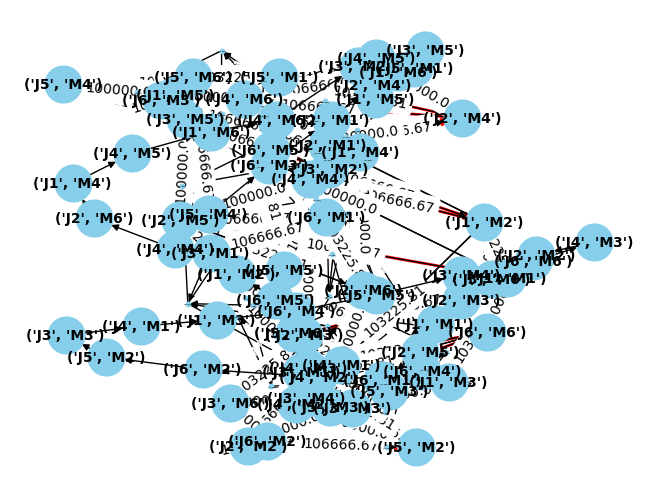

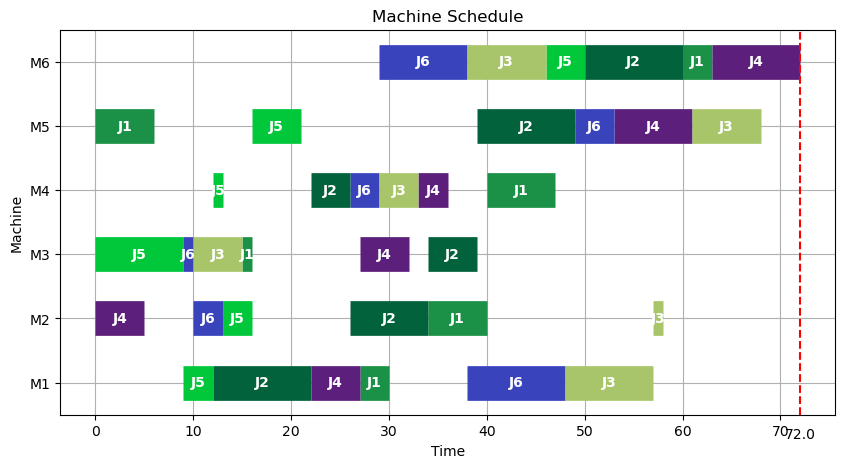

--------------------------------------------------------------------------------------------------------------
      Example  Max_End_Time  \
1099     1099            63   
450       450            64   
1071     1071            64   

                                  Job_Machine_Sequences    Weight  
1099  ((J3, M3), (J2, M2), (J3, M4), (J2, M3), (J6, ...  101587.3  
450   ((J3, M3), (J3, M4), (J1, M3), (J4, M2), (J3, ...  100000.0  
1071  ((J3, M3), (J6, M2), (J6, M4), (J2, M2), (J6, ...  100000.0  
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/natpassapongkulcharasamnuay/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/87fab2b4018649d98562454e9c1ddaaf-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /var/folders/gm/41845hv10sz69hz_8hbqqrdm0000gn/T/87fab2b4018649d98562454e9c1ddaaf-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At 

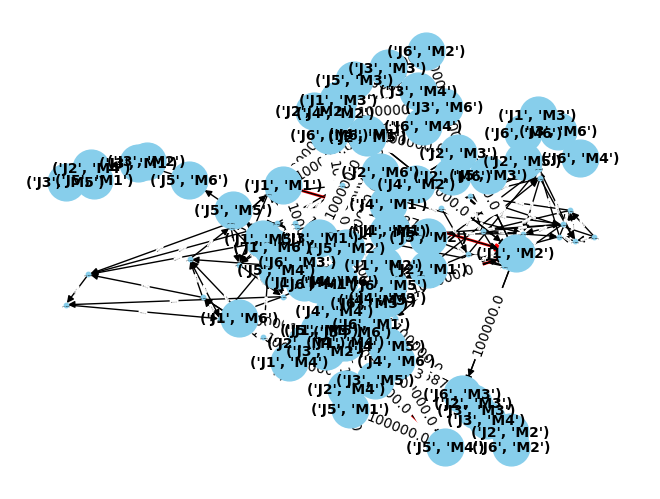

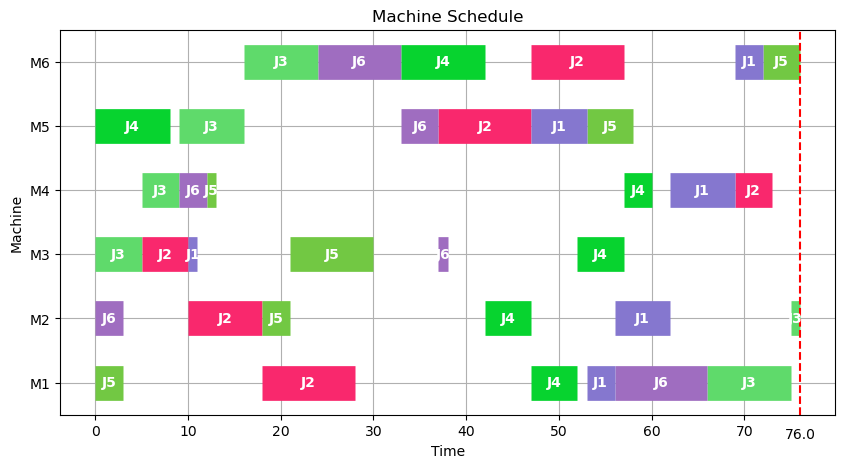

--------------------------------------------------------------------------------------------------------------


In [52]:
for i in range(100):
    start = time.time()
    def job_shop_scheduling_random_choose(TASKS):
        machines = sorted(list(set(task['machine'] for task in TASKS)))
        jobs = sorted(list(set(task['job'] for task in TASKS)))

        job_times = {job: 0 for job in jobs}
        machine_times = {machine: 0 for machine in machines}
        schedules = []

        while TASKS:
            # Find tasks that can be scheduled
            schedulable_tasks = [task for task in TASKS if task['prec'] is None or task['prec'] in [(s[0], s[1]) for s in schedules]]

            if schedulable_tasks:
                next_task = random.choice(schedulable_tasks)
            else:
                # If no schedulable tasks, break the loop to avoid infinite loop
                break

            job, machine = next_task['job'], next_task['machine']
            start_time = max(job_times[job], machine_times[machine])
            end_time = start_time + next_task['dur']
            schedule = (job, machine, start_time, end_time)
            job_times[job] = end_time
            machine_times[machine] = end_time
            schedules.append(schedule)
            TASKS.remove(next_task)

        return schedules

    def sampling_jss(TASKS , rev):
        all_schedules = {}
        for i in range(rev):
            # Make a copy of the original_TASKS to use in each example
            task = TASKS.copy()
            example_schedule = job_shop_scheduling_random_choose(task)

            # Store the schedule in the dictionary with the example number as the key
            all_schedules[i] = example_schedule
        return all_schedules

    # Create an empty list to store scheduling information
    scheduling_info = []

    # Iterate through the schedules and add them to the list
    ####################################### Input HERE !!! #################################################
    for example, schedule in sampling_jss(ft10,3000).items():
        for step, (job, machine, start_time, end_time) in enumerate(schedule, start=1):
            scheduling_info.append({'Example': example, 'Job': job, 'Machine': machine, 'Start Time': start_time, 'End Time': end_time})
    df = pd.DataFrame(scheduling_info)

    # Convert the "End Time" column to numeric
    df['End Time'] = pd.to_numeric(df['End Time'])

    # Group the DataFrame by the "Example" column
    grouped = df.groupby('Example')

    # Initialize empty lists to store results
    max_end_times = []
    job_machine_sequences = []

    # Iterate through each example group
    for example, group in grouped:
        # Find the index of the maximum end time for this example
        max_end_time_index = group['End Time'].idxmax()

        # Get all job and machine sequences for this example
        sequences = group[['Job', 'Machine']].values.tolist()

        # Append the results to the lists
        max_end_times.append(group.loc[max_end_time_index, 'End Time'])
        job_machine_sequences.append(sequences)

    # Create a DataFrame to display the results
    result_df = pd.DataFrame({'Example': grouped.groups.keys(), 'Max_End_Time': max_end_times, 'Job_Machine_Sequences': job_machine_sequences})

    result_df['Job_Machine_Sequences'] = result_df['Job_Machine_Sequences'].apply(lambda x: tuple(map(tuple, x)))

    # Drop duplicates
    result_df = result_df.drop_duplicates(subset=['Max_End_Time', 'Job_Machine_Sequences'])

    # Sort the DataFrame by the "Min_End_Time" column in ascending order
    sorted_df = result_df.copy().sort_values(by='Max_End_Time', ascending=True)

    # Get the top 30 minimum end times and their associated sequences
    top_min_end_times= sorted_df.head(3)
    top_min_end_times = top_min_end_times[['Example' , 'Max_End_Time' , 'Job_Machine_Sequences']]
    top_min_end_times_example = top_min_end_times['Example'].values
    top_min_end_times['Weight'] = round(max(top_min_end_times['Max_End_Time'])*100000/top_min_end_times['Max_End_Time'],2)

    print(top_min_end_times)
    # Create a directed graph from your data
    G = nx.DiGraph()

    # Initialize a defaultdict to store aggregated weights for all pairs of nodes
    aggregated_weights = defaultdict(float)

    # Add edges with weights
    for idx, row in top_min_end_times.iterrows():
        job_machine_sequence = row['Job_Machine_Sequences']
        weight = row['Weight']
        # Iterate through each consecutive pair of job-machine pairs in the sequence
        for i in range(len(job_machine_sequence) - 1):
            pair1 = job_machine_sequence[i]
            pair2 = job_machine_sequence[i + 1]
            # Form unique keys for the pairs to store aggregated weights
            key = (pair1, pair2)
            # Add the weight to the aggregated weights dictionary for the pair of nodes
            aggregated_weights[key] += weight

    # Add edges with aggregated weights
    for pairs, weight_sum in aggregated_weights.items():
        pair1, pair2 = pairs
        G.add_edge(pair1, pair2, weight=weight_sum)

    # Draw the graph
    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=10, node_color='skyblue', font_size=0.1, font_weight='bold')

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels , font_size=0.1)

    # Show the graph
    #plt.show()

    # Add edges with weights
    for idx, row in top_min_end_times.iterrows():
        job_machine_sequence = row['Job_Machine_Sequences']
        weight = row['Weight']
        for i in range(len(job_machine_sequence) - 1):
            G.add_edge(job_machine_sequence[i], job_machine_sequence[i+1], weight=weight)

    # Initialize PuLP problem
    prob = pulp.LpProblem("Job_Shop_Scheduling", pulp.LpMaximize)

    # Decision variables
    x = pulp.LpVariable.dicts("start", G.edges(), cat='Binary')

    # Objective function
    prob += pulp.lpSum(x[(source, target)] * G[source][target]['weight'] for source, target in G.edges())

    # Constraints
    for node in G.nodes():
        # Each job starts exactly once
        prob += pulp.lpSum(x[(source, target)] for source, target in G.out_edges(node)) == 1

    ####################################### Input HERE !!! #################################################
    # Find the first task with 'prec' attribute as None
    first_task = next(task for task in ft06 if task['prec'] is None) ########## input

    # Manually specify the initial node based on the first task
    first_node = (first_task['job'], first_task['machine'])

    # Add constraint to ensure the selected node is the starting node
    prob += pulp.lpSum(x[(source, target)] for source, target in G.out_edges(first_node)) == 1

    # Solve the problem
    prob.solve()

    # Print the status of the solution
    #print("Status:", pulp.LpStatus[prob.status])

    # Print the total profit
    #print("Total Profit:", pulp.value(prob.objective))

    # Draw the graph with solution
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw edges
    selected_edges = [(source, target) for source, target in G.edges() if pulp.value(x[(source, target)]) > 0.5]
    non_selected_edges = [(source, target) for source, target in G.edges() if pulp.value(x[(source, target)]) <= 0.5]

    nx.draw_networkx_edges(G, pos, edgelist=selected_edges, edge_color='red', width=2)  # Selected edges
    nx.draw_networkx_edges(G, pos, edgelist=non_selected_edges, edge_color='black', width=1)  # Non-selected edges

    # Draw nodes and labels
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Show the graph
    #plt.show()

    # Extract the sequence of selected jobs from the solution
    selected_jobs = [edge for edge in G.edges() if pulp.value(x[edge]) > 0.5]
    #selected_jobs  = selected_jobs[0:-1]

    # Create a new directed graph containing only the selected jobs
    selected_graph = nx.DiGraph(selected_jobs)

    # Draw the selected graph
    pos = nx.spring_layout(selected_graph)  # Positions for all nodes
    nx.draw(selected_graph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(selected_graph, 'weight')
    nx.draw_networkx_edge_labels(selected_graph, pos, edge_labels=edge_labels)

    # Show the graph
    #plt.show()

    def get_sequence(order_assignment):
        G = nx.DiGraph()
        for pair in order_assignment:
            G.add_edge(pair[0], pair[1])

        # Check if the graph has cycles
        if not nx.is_directed_acyclic_graph(G):
            print("The graph contains cycles. Removing cycles...")
            cycles = list(nx.simple_cycles(G))
            # Break the cycles by removing edges
            for cycle in cycles:
                for i in range(len(cycle)):
                    G.remove_edge(cycle[i], cycle[(i+1) % len(cycle)])  # Remove edges to break the cycle

        # Get the topological sort
        topological_order = list(nx.topological_sort(G))

        # Create a list of job-machine sequences
        sequences = [(topological_order[i]) for i in range(len(topological_order))]

        return sequences

    sequence = get_sequence(selected_jobs)

    def job_shop_scheduling_sequence(TASKS, sequence):
        machines = sorted(list(set(task['machine'] for task in TASKS)))
        jobs = sorted(list(set(task['job'] for task in TASKS)))

        job_times = {job: 0 for job in jobs}
        machine_times = {machine: 0 for machine in machines}
        schedules = []

        for task_pair in sequence:
            job, machine = task_pair
            next_task = next((task for task in TASKS if task['job'] == job and task['machine'] == machine), None)

            if next_task:
                start_time = max(job_times[job], machine_times[machine])
                end_time = start_time + next_task['dur']
                schedule = (job, machine, start_time, end_time)
                job_times[job] = end_time
                machine_times[machine] = end_time
                schedules.append(schedule)
                TASKS.remove(next_task)

        return schedules
    ####################################### Input HERE !!! #################################################
    result_schedules = job_shop_scheduling_sequence(ft06.copy(), sequence)
    end = time.time()
    # visualization
    def job_shop_scheduling_sequence_to_df(schedule_data):
        df_schedule = pd.DataFrame(schedule_data, columns=['Job', 'Machine', 'Start Time', 'End Time'])

    # Add the 'Example' column
        df_schedule['Example'] = (df_schedule.groupby(['Job', 'Machine']).cumcount() + 1).astype(str)

    # Reorder columns
        df_schedule = df_schedule[['Example', 'Job', 'Machine', 'Start Time', 'End Time']]

    # Print the DataFrame
        return(df_schedule)

    def generate_random_color():
        # Generate a random color in hexadecimal format
        return "#{:06x}".format(np.random.randint(0, 256**3))

    # Plot this sequence
    def visualize_gantt_chart_machine_sequence(df):
        MACHINES = sorted(list(df['Machine'].unique()))
        unique_jobs = df['Job'].unique()
        num_jobs = len(unique_jobs)
        makespan = df['End Time'].max()

        # Define a dictionary to map jobs to colors
        job_colors = {job: generate_random_color() for job in unique_jobs}

        plt.figure(figsize=(10, 5))

        bar_style = {'alpha': 1.0, 'lw': 25, 'solid_capstyle': 'butt'}
        text_style = {'color': 'white', 'weight': 'bold', 'ha': 'center', 'va': 'center'}

        df.sort_values(by=['Machine', 'Start Time'])
        df.set_index(['Machine', 'Job'], inplace=True)

        plt.title('Machine Schedule')
        plt.ylabel('Machine')
        plt.ylim(0.5, len(MACHINES) + 0.5)
        plt.yticks(range(1, 1 + len(MACHINES)), MACHINES)

        for mdx, m in enumerate(MACHINES, 1):
            for jdx, j in enumerate(unique_jobs, 1):
                if (m, j) in df.index:
                    xs = df.loc[(m, j), 'Start Time']
                    xf = df.loc[(m, j), 'End Time']

                    # Get the color for the current job
                    job_color = job_colors.get(j, 'gray')  # Default to gray if not specified

                    plt.plot([xs, xf], [mdx] * 2, c=job_color, **bar_style)
                    plt.text((xs + xf) / 2, mdx, j, **text_style)

        plt.text(makespan, plt.ylim()[0] - 0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
        plt.plot([makespan] * 2, plt.ylim(), 'r--')
        plt.grid(True)

        plt.xlabel('Time')
        plt.show()

    # Assuming df_sorted is your DataFrame
    # To visualize all examples, use: visualize_gantt_chart_machine(df_sorted)
    print("The time of execution of above program is :", end-start)
    visualize_gantt_chart_machine_sequence(job_shop_scheduling_sequence_to_df(result_schedules))
    print("--------------------------------------------------------------------------------------------------------------")